# Exploratory data analysis of NeuronUP rehabilitation exercises data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#from google.colab import drive
#import ast
#sns.set()
#drive.mount('/content/drive')
# others

In [2]:
neuronUP_5colors = ['#66e9ff',
                   '#00cdef','#00abc8','#0089a1','#00798d']
neuronUP_10colors_darktolight = ['#00798d','#0089a1','#009ab4','#00abc8','#00bcdc','#00cdef','#04dbff','#66e9ff','#7aecff','#8deeff']
neuronUP_12colors = ['#00798d','#0089a1','#009ab4','#00abc8','#00bcdc','#00cdef','#04dbff','#66e9ff','#7aecff','#8deeff', '#b4f4ff', '#dcfaff']


In [3]:
#areas_df = pd.read_csv('/content/drive/MyDrive/Joshua_NeuronUP/Data/areas.csv')
areas_df = pd.read_csv('areas.csv')
areas_df.head()

,activity_id,parent_id,area_id,parent_name,name,position
0,1,13,35,Memory,Episodic Memory,1
1,267,13,35,Memory,Episodic Memory,1
2,267,52,53,Executive Functions,Working M.,2
3,267,14,15,Attention,Selective Attention,3
4,268,52,53,Executive Functions,Working M.,1


#### Activities with best scores - from first notebook

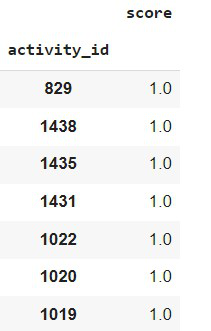

In [4]:
from PIL import Image
myImage = Image.open("best_activities.jpg")
myImage

In [5]:
activity_829 = pd.read_csv('activity_829.csv')
activity_829['activity_id'] = np.repeat(829, len(activity_829))
activity_829.head()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,generator_errores,generator_tiempo,generator_intentos,generator_omisiones,generator_realizacion,generator_respuesta
0,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,54.2,19,0,Superada,Correcta
1,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,58.1,23,0,Superada,Correcta
2,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,77.4,25,0,Superada,Correcta
3,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,45.5,15,0,Superada,Correcta
4,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,60.1,23,0,Superada,Correcta


# activity 829

## 829 basic statistics 

#### Game type = Generator

In [6]:
len(activity_829)

34420

In [7]:
patient_times_played = activity_829['patient_id'].value_counts()
patient_times_played

103573    1006
142557     646
7254       629
85602      555
1691       446
          ... 
10228        1
19344        1
50478        1
6358         1
25790        1
Name: patient_id, Length: 3000, dtype: int64

In [8]:
times_played = pd.DataFrame()
times_played['times_played'] = patient_times_played
times_played

,times_played
103573,1006
142557,646
7254,629
85602,555
1691,446
...,...
10228,1
19344,1
50478,1
6358,1


In [9]:
(activity_829['patient_id'].value_counts())

103573    1006
142557     646
7254       629
85602      555
1691       446
          ... 
10228        1
19344        1
50478        1
6358         1
25790        1
Name: patient_id, Length: 3000, dtype: int64

In [10]:
times_played.describe()

,times_played
count,3000.000000
mean,11.473333
std,36.352686
min,1.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,1006.000000


#### Maximum times a user played an activity was 1006 times, minimum times was 1

#### histogram of times played (mode)


3000 different patient IDs have played activity 829

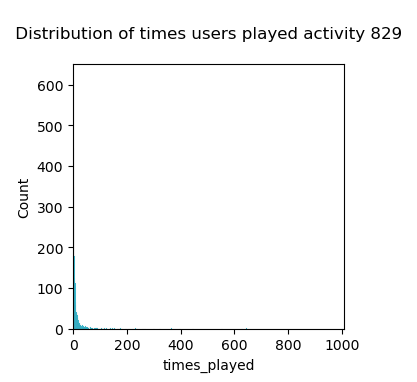

In [11]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 3.5), dpi=100)
data= times_played['times_played']
p = sns.histplot(data=data, color='#00ABC8')
p.set_title('\n Distribution of times users played activity 829 \n')
ax.axis(xmin=0, xmax=1010)
ax.axis(ymin=0, ymax=650)
plt.show()

This isn't showing much - lets split the histogram into how many users played the activity under 100 and times played over 100

In [12]:
times_played = pd.DataFrame()
times_played['times_played'] = patient_times_played
times_played_over60 = times_played[times_played['times_played'] > 60]
times_played_over60.head()

,times_played
103573,1006
142557,646
7254,629
85602,555
1691,446


In [13]:
times_played = pd.DataFrame()
times_played['times_played'] = patient_times_played
times_played_upto60 = times_played[times_played['times_played'] <= 60]
times_played_upto60.head()

,times_played
120241,60
4616,60
65724,60
140724,59
64683,59


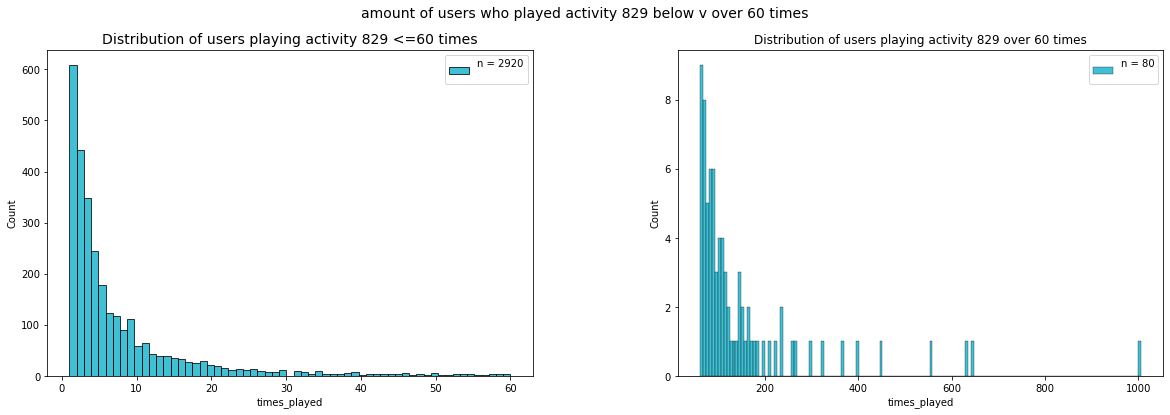

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('amount of users who played activity 829 below v over 60 times ', fontsize=14)
label1 = 'n = ' + str(len(times_played_upto60)) + '\n '
label2 = 'n = ' + str(len(times_played_over60)) + '\n '
ax = sns.histplot(ax=axes[0], data=times_played_upto60['times_played'], label=label1, color='#00ABC8')
axes[0].set_title('Distribution of users playing activity 829 <=60 times', fontsize=14, y=1)
ax.legend(loc='best')
ax = sns.histplot(ax=axes[1], data=times_played_over60['times_played'],bins=150, label=label2, color='#00ABC8')
axes[1].set_title('Distribution of users playing activity 829 over 60 times', y=1)
ax.legend(loc='best')
plt.subplots_adjust(wspace=0.3)

In [15]:
np.argmax(ax)

0

In [16]:
unique, counts = np.unique(times_played['times_played'], return_counts=True)
result = np.column_stack((unique, counts)) 
result[0]

array([  1, 608], dtype=int64)

In [17]:
df = pd.DataFrame(result, columns=['count', 'times_played'])
df.iloc[0]

count             1
times_played    608
Name: 0, dtype: int64

#### 608 patients played activity 829 just 1 time - the most common (mode). However, some patients did continue to play this activity with a few users even playing the activity hundreds of times - and 1 user playing activity 829 over 1000 times!

In [18]:
df

,count,times_played
0,1,608
1,2,443
2,3,349
3,4,245
4,5,178
...,...,...
121,446,1
122,555,1
123,629,1
124,646,1


In [19]:
df.describe()

,count,times_played
count,126.000000,126.000000
mean,106.325397,23.809524
std,140.391899,78.853963
min,1.000000,1.000000
25%,32.250000,1.000000
50%,66.500000,2.000000
75%,114.750000,7.000000
max,1006.000000,608.000000


#### lets look at the user who played this activity 1006  times

In [20]:
# get user 103573

by_date829 = activity_829[activity_829['patient_id']==103573].groupby('date')
by_date829.aggregate(np.mean).sort_values(by='generator_tiempo')

,patient_id,center_id,session_id,activity_id,result_id,difficulty,score,generator_errores,generator_tiempo,generator_intentos,generator_omisiones
date,,,,,,,,,,,
2021-10-18,103573.0,30396.0,4019451.0,829.0,3.917811e+07,NaN,1.0,0.0,10.400000,6.000000,0.0
2021-10-14,103573.0,30396.0,3786820.0,829.0,3.897063e+07,NaN,1.0,0.0,13.400000,6.263158,0.0
2021-06-21,103573.0,30396.0,3435867.0,829.0,3.274848e+07,NaN,1.0,0.0,13.511765,4.823529,0.0
2022-04-08,103573.0,30396.0,5006108.0,829.0,5.129669e+07,NaN,1.0,0.0,14.316667,5.444444,0.0
2021-09-20,103573.0,30396.0,3786409.0,829.0,3.731299e+07,NaN,1.0,0.0,14.320000,3.200000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,103573.0,30396.0,5135850.0,829.0,5.261901e+07,NaN,1.0,0.0,124.200000,4.000000,0.0
2021-04-19,103573.0,30396.0,2962219.0,829.0,2.818778e+07,NaN,1.0,0.0,128.150000,2.000000,0.0
2021-05-10,103573.0,30396.0,3132037.0,829.0,2.974129e+07,NaN,1.0,0.0,156.500000,5.000000,0.0


patient ID 103573 completed activity 829 1006 times over 131 different dates 

#### growth ratio (number of results generated per day/month and year)

In [21]:
activity829 = activity_829.copy()
activity829.head()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,generator_errores,generator_tiempo,generator_intentos,generator_omisiones,generator_realizacion,generator_respuesta
0,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,54.2,19,0,Superada,Correcta
1,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,58.1,23,0,Superada,Correcta
2,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,77.4,25,0,Superada,Correcta
3,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,45.5,15,0,Superada,Correcta
4,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,60.1,23,0,Superada,Correcta


In [22]:
from pandas.core.indexers import length_of_indexer
activity829['date'] = pd.to_datetime(activity829['date']).copy()
activity829['year']= activity829['date'].dt.year.copy()
activity829['month']= activity829['date'].dt.month.copy()
activity829['day']= activity829['date'].dt.day.copy()
activity829['month_name'] = activity829['date'].dt.month_name().copy()
activity829['day_of_week'] = activity829['date'].dt.dayofweek.copy()
dw_mapping={
    0: 'Monday',
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'} 
activity829['day_of_week_name']=activity829['date'].dt.weekday.map(dw_mapping).copy()
activity829_date= activity829[['patient_id', 'date', 'year', 'month', 'day', 'month_name', 'day_of_week', 'day_of_week_name']]
activity829_date.sort_values(by='date').head()

,patient_id,date,year,month,day,month_name,day_of_week,day_of_week_name
1984,6098,2016-09-14,2016,9,14,September,2,Wednesday
1983,6098,2016-09-14,2016,9,14,September,2,Wednesday
1962,5834,2016-09-14,2016,9,14,September,2,Wednesday
3984,7978,2016-09-14,2016,9,14,September,2,Wednesday
1248,4300,2016-09-14,2016,9,14,September,2,Wednesday


In [23]:
by_year = activity829.groupby('year')
year_count = by_year.aggregate(np.count_nonzero)
year_count = year_count[['patient_id']]
year_count = year_count.reset_index()
year_count= year_count.rename(columns={'patient_id':'Activities_played'})
year_count

,year,Activities_played
0,2016,1039
1,2017,4853
2,2018,3181
3,2019,2947
4,2020,7727
5,2021,10268
6,2022,4405


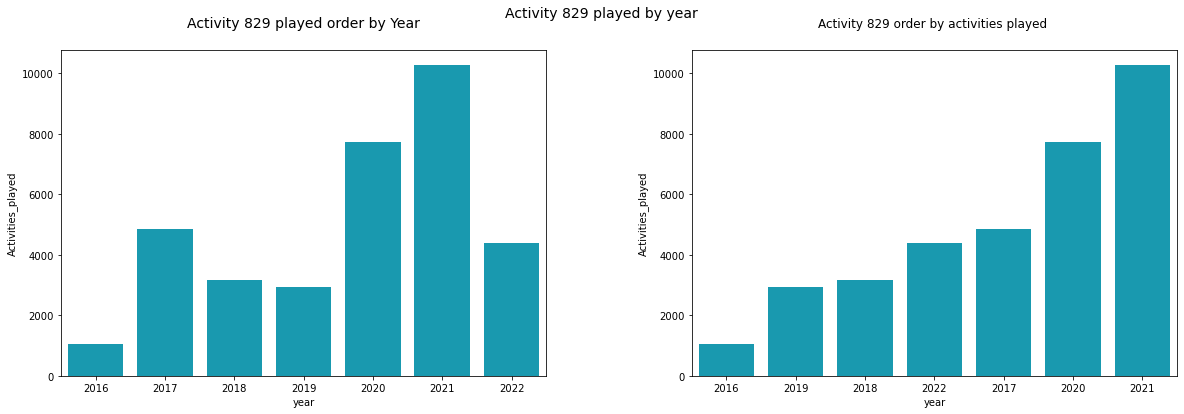

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Activity 829 played by year', fontsize=14)
ax = sns.barplot(ax=axes[0], data=year_count,x='year',y='Activities_played', order=year_count.sort_values('year').year, color='#00ABC8')
axes[0].set_title('Activity 829 played order by Year', fontsize=14, y=1.05)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax = sns.barplot(ax=axes[1], data=year_count,x='year',y='Activities_played', order=year_count.sort_values('Activities_played').year, color='#00ABC8')
axes[1].set_title('Activity 829 order by activities played ', y=1.05)
plt.subplots_adjust(wspace=0.3)

#### note that 2016 and 2022 are not full years. 2016 starts in Sept and 2022 ends in July

In [25]:
activity829.sort_values(by='date').head()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,generator_errores,...,generator_intentos,generator_omisiones,generator_realizacion,generator_respuesta,year,month,day,month_name,day_of_week,day_of_week_name
1984,6098,117,99132.0,829,generator,2016-09-14,597168,NaN,1.0,0,...,17,0,Superada,Correcta,2016,9,14,September,2,Wednesday
1983,6098,117,99132.0,829,generator,2016-09-14,597168,NaN,1.0,0,...,19,0,Superada,Correcta,2016,9,14,September,2,Wednesday
1962,5834,542,99299.0,829,generator,2016-09-14,597955,NaN,1.0,0,...,16,0,Superada,Correcta,2016,9,14,September,2,Wednesday
3984,7978,727,NaN,829,generator,2016-09-14,598106,NaN,1.0,0,...,19,0,Superada,Correcta,2016,9,14,September,2,Wednesday
1248,4300,243,544034.0,829,generator,2016-09-14,597795,NaN,1.0,0,...,24,0,Superada,Correcta,2016,9,14,September,2,Wednesday


In [26]:
activity829.sort_values(by='date').tail()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,generator_errores,...,generator_intentos,generator_omisiones,generator_realizacion,generator_respuesta,year,month,day,month_name,day_of_week,day_of_week_name
32794,142557,30396,5565933.0,829,generator,2022-07-01,57290817,NaN,1.0,0,...,9,0,Superada,Correcta,2022,7,1,July,4,Friday
32795,142557,30396,5565933.0,829,generator,2022-07-01,57290817,NaN,1.0,0,...,4,0,Superada,Correcta,2022,7,1,July,4,Friday
32796,142557,30396,5565933.0,829,generator,2022-07-01,57290817,NaN,1.0,0,...,3,0,Superada,Correcta,2022,7,1,July,4,Friday
32798,142557,30396,5565933.0,829,generator,2022-07-01,57290817,NaN,1.0,0,...,2,0,Superada,Correcta,2022,7,1,July,4,Friday
32797,142557,30396,5565933.0,829,generator,2022-07-01,57290817,NaN,1.0,0,...,2,0,Superada,Correcta,2022,7,1,July,4,Friday


In [27]:
by_month = activity829.groupby('month')
month_count = by_month.aggregate(np.count_nonzero)
month_count = month_count[['patient_id']]
month_count = month_count.reset_index()
month_count= month_count.rename(columns={'patient_id':'Activities_played'})
month_count.sort_values(by='Activities_played')

,month,Activities_played
7,8,1630
11,12,2152
6,7,2320
8,9,2414
0,1,2980
5,6,3124
9,10,3184
10,11,3198
3,4,3204
1,2,3292


In [28]:
by_month_name = activity829.groupby('month_name')
month__name_count = by_month_name.aggregate(np.count_nonzero)
month__name_count = month__name_count[['patient_id']]
month__name_count = month__name_count.reset_index()
month__name_count= month__name_count.rename(columns={'patient_id':'Activities_played'})
month__name_count

,month_name,Activities_played
0,April,3204
1,August,1630
2,December,2152
3,February,3292
4,January,2980
5,July,2320
6,June,3124
7,March,3482
8,May,3440
9,November,3198


In [29]:
mean_act_per_month = np.mean(month__name_count['Activities_played'])
mean_act_per_month = str(round(mean_act_per_month, 2))
median_act_per_month = np.median(month__name_count['Activities_played'])
median_act_per_month = str(round(median_act_per_month, 2))
print('Mean number of activity 829 played per month', mean_act_per_month)
print('Median number of activity 829 played per month', median_act_per_month)

Mean number of activity 829 played per month 2868.33
Median number of activity 829 played per month 3154.0


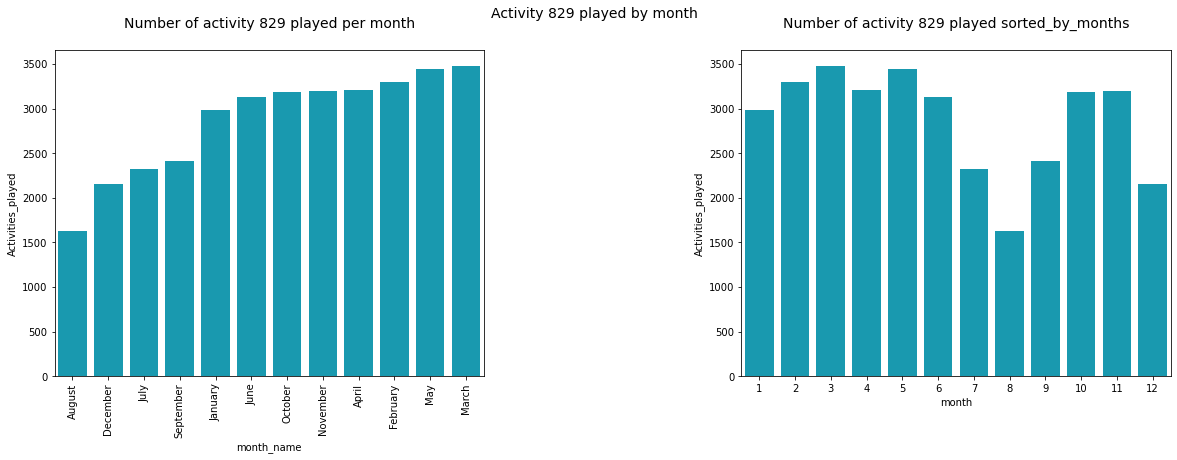

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Activity 829 played by month', fontsize=14)
ax = sns.barplot(ax=axes[0], data=month__name_count,x='month_name',y='Activities_played', order=month__name_count.sort_values('Activities_played').month_name, color='#00ABC8')
axes[0].set_title('Number of activity 829 played per month', fontsize=14, y=1.05)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax = sns.barplot(ax=axes[1], data=month_count,x='month',y='Activities_played', order=month_count.sort_values('month').month, color='#00ABC8')
axes[1].set_title('Number of activity 829 played sorted_by_months',fontsize=14, y=1.05)
plt.subplots_adjust(wspace=0.6)

#### Activity 829 was played less in the summer and winter months, likely because of holidays

In [31]:
by_day_of_week = activity829.groupby('day_of_week_name')
day_of_week_count = by_day_of_week.aggregate(np.count_nonzero)
day_of_week_count = day_of_week_count.rename(columns={'patient_id':'Activities_played'})
day_of_week_count[['Activities_played']].sort_values(by='Activities_played')

,Activities_played
day_of_week_name,
Sunday,1161
Saturday,1749
Friday,4738
Monday,6304
Thursday,6353
Wednesday,7001
Tuesday,7114


#### Activity 829 is played the least on friday, Saturday and Sunday, likely because this is the weekend.

In [32]:
by_day_of_month = activity829.groupby('day')
day_of_month_count = by_day_of_month.aggregate(np.count_nonzero)
day_of_month_count = day_of_month_count.rename(columns={'patient_id':'Activities_played'})
day_of_month_count[['Activities_played']].sort_values(by='Activities_played')

,Activities_played
day,
31,599
4,922
30,941
20,959
6,979
3,993
2,1019
1,1021
10,1024


#### activity 829 is played the least on the last day of the month
** Note that not all months have a 31st, so this could be why 31st is there

### Show result variables

In [33]:
activity_829.head()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,generator_errores,generator_tiempo,generator_intentos,generator_omisiones,generator_realizacion,generator_respuesta
0,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,54.2,19,0,Superada,Correcta
1,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,58.1,23,0,Superada,Correcta
2,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,77.4,25,0,Superada,Correcta
3,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,45.5,15,0,Superada,Correcta
4,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,60.1,23,0,Superada,Correcta


In [34]:
activity_829['generator_errores'].value_counts()

0    34419
1        1
Name: generator_errores, dtype: int64

only 1 exercise at 829 has an error - 34419 out of 34420 had 0 error

In [35]:
by_error = activity_829.groupby('generator_errores')
means = by_error.aggregate(np.mean)
means

,patient_id,center_id,session_id,activity_id,result_id,difficulty,score,generator_tiempo,generator_intentos,generator_omisiones
generator_errores,,,,,,,,,,
0,69767.024434,13906.009994,2.204475e+06,829.0,2.115274e+07,NaN,1.0,50.539144,15.432087,0.0
1,20618.000000,3159.000000,3.534320e+05,829.0,5.114022e+06,NaN,0.5,13.500000,18.000000,0.0


#### average time it takes to complete activity 829 50.54s,with 15 attempts

In [36]:
activity_829['generator_realizacion'].value_counts()

Superada     34419
Aceptable        1
Name: generator_realizacion, dtype: int64

In [37]:
activity_829['generator_respuesta'].value_counts()

Correcta    34420
Name: generator_respuesta, dtype: int64

### Show the different domains and subdomains that are worked in the activity.

In [38]:
areas_df.head()

,activity_id,parent_id,area_id,parent_name,name,position
0,1,13,35,Memory,Episodic Memory,1
1,267,13,35,Memory,Episodic Memory,1
2,267,52,53,Executive Functions,Working M.,2
3,267,14,15,Attention,Selective Attention,3
4,268,52,53,Executive Functions,Working M.,1


In [39]:
areas_df[areas_df['activity_id']==829]

,activity_id,parent_id,area_id,parent_name,name,position
415,829,52,53,Executive Functions,Working M.,1


Activity 829 works on Executive functions, specifically working memory


 #### Activity 829 is a generator type game which has no difficulty level

In [40]:
activity_829['score'].mean()

0.9999854735618826

In [41]:
activity_829['score'].value_counts()

1.0    34419
0.5        1
Name: score, dtype: int64

#### only 1 time did someone not get a score of 1 on activity 829

In [42]:
by_patient = activity_829.groupby('patient_id')
patient_score_mean829 = by_patient.aggregate(np.mean)
patient_score_mean829.sort_values(by='score', ascending=True)

,center_id,session_id,activity_id,result_id,difficulty,score,generator_errores,generator_tiempo,generator_intentos,generator_omisiones
patient_id,,,,,,,,,,
20618,3159.0,3.235079e+05,829.0,4.311277e+06,NaN,0.954545,0.090909,28.136364,20.090909,0.0
31,7.0,4.765466e+06,829.0,4.786465e+07,NaN,1.000000,0.000000,62.337500,21.250000,0.0
87348,27861.0,1.595848e+06,829.0,1.399364e+07,NaN,1.000000,0.000000,36.792857,19.928571,0.0
87351,27861.0,1.927173e+06,829.0,1.711984e+07,NaN,1.000000,0.000000,32.553503,5.535032,0.0
87354,27861.0,1.593053e+06,829.0,1.401102e+07,NaN,1.000000,0.000000,33.697436,11.948718,0.0
...,...,...,...,...,...,...,...,...,...,...
29393,204.0,3.501840e+05,829.0,3.987455e+06,NaN,1.000000,0.000000,23.150000,18.700000,0.0
29411,437.0,8.658150e+05,829.0,7.697448e+06,NaN,1.000000,0.000000,81.750000,16.000000,0.0
29460,544.0,2.725920e+05,829.0,3.042782e+06,NaN,1.000000,0.000000,30.675000,18.750000,0.0


#### only 1 patient did not average a score of 1 on activity 829, with an average score of 0.92 - played activity 829 11 times

In [43]:
times_played_reset = times_played.reset_index()
times_played_reset[times_played_reset['index']==20618]

,index,times_played
647,20618,11


### Calculate histograms of the Score per exercise and the average Score per user

In [44]:
patient_score_mean829.head()

,center_id,session_id,activity_id,result_id,difficulty,score,generator_errores,generator_tiempo,generator_intentos,generator_omisiones
patient_id,,,,,,,,,,
31,7.0,4765466.0,829.0,47864654.0,NaN,1.0,0.0,62.3375,21.25,0.0
237,15.0,99509.0,829.0,599843.0,NaN,1.0,0.0,78.0000,17.00,0.0
281,15.0,99534.0,829.0,600174.0,NaN,1.0,0.0,93.0000,18.00,0.0
340,15.0,99512.0,829.0,618413.0,NaN,1.0,0.0,135.0000,16.00,0.0
409,42.0,NaN,829.0,624829.0,NaN,1.0,0.0,47.0000,22.50,0.0


Text(0.5, 1.0, 'Average Patient score on activity 829')

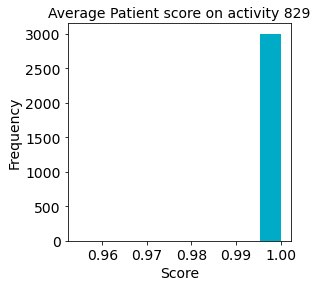

In [45]:
ax = patient_score_mean829['score'].plot(kind='hist', fontsize=14, color='#00ABC8', figsize=(4,4))
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Average Patient score on activity 829', fontsize=14)


### Calculate, when possible, the proportion of successes, proportion of errors. Histogram of these proportions

In [46]:
activity_829.head()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,generator_errores,generator_tiempo,generator_intentos,generator_omisiones,generator_realizacion,generator_respuesta
0,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,54.2,19,0,Superada,Correcta
1,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,58.1,23,0,Superada,Correcta
2,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,77.4,25,0,Superada,Correcta
3,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,45.5,15,0,Superada,Correcta
4,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,60.1,23,0,Superada,Correcta


In [47]:
activity_829['session_id'].value_counts()

2216459.0    35
4818962.0    29
4684520.0    29
3403135.0    29
2048139.0    26
             ..
107533.0      1
1728276.0     1
2631259.0     1
2668917.0     1
132139.0      1
Name: session_id, Length: 9000, dtype: int64

In [48]:
activity_829['generator_tiempo'].value_counts()

180.0    153
32.0     131
34.0     127
30.0     125
36.0     124
        ... 
126.3      1
138.5      1
181.1      1
142.5      1
176.7      1
Name: generator_tiempo, Length: 1748, dtype: int64

In [49]:
activity_829['generator_intentos'].value_counts()

18     2444
17     2364
16     2347
19     2316
20     2248
21     2224
24     2169
22     2140
23     2100
2      1610
3      1421
15     1254
4      1225
5      1110
25     1101
7       994
6       950
8       939
9       868
1       770
10      555
11      191
12      181
14      141
13      139
26       96
28       95
27       88
29       79
30       63
36       26
32       22
44       18
34       17
40       16
48       13
38       13
42       11
46       11
33        8
50        8
31        7
35        5
37        5
39        4
43        2
49        1
41        1
105       1
88        1
52        1
87        1
59        1
47        1
63        1
57        1
75        1
60        1
Name: generator_intentos, dtype: int64

In [50]:
activity_829['generator_respuesta'].value_counts()

Correcta    34420
Name: generator_respuesta, dtype: int64

In [51]:
activity_829['generator_realizacion'].value_counts()

Superada     34419
Aceptable        1
Name: generator_realizacion, dtype: int64

### Calculate the average time to perform an exercise, the mode, etc. Show the histogram of this variable to see how the different times are distributed

Text(0.5, 1.0, 'Average time on activity 829')

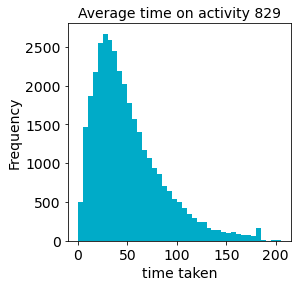

In [52]:
bins = np.arange(0, 210, 5)
ax = activity_829['generator_tiempo'].plot(kind='hist', fontsize=14, color='#00ABC8', bins=bins, figsize=(4,4))
plt.xlabel('time taken', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Average time on activity 829', fontsize=14)

In [53]:
activity_829['generator_tiempo'].describe()

count    34420.000000
mean        50.538068
std         35.205458
min          0.600000
25%         25.000000
50%         42.000000
75%         67.400000
max        294.700000
Name: generator_tiempo, dtype: float64

Text(0, 0.5, 'Time')

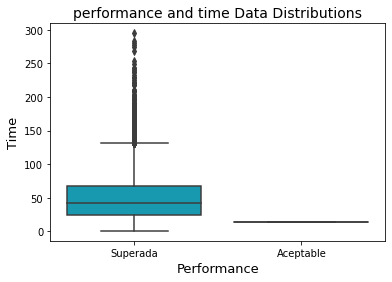

In [54]:
ax = sns.boxplot(x=activity_829['generator_realizacion'], y=activity_829['generator_tiempo'], data=activity_829, color='#00ABC8')
ax.set_title('performance and time Data Distributions', fontsize=14)
ax.set_xlabel('Performance', fontsize=13)
ax.set_ylabel('Time', fontsize=13)

### Attempts (intentos) at exercise 

Text(0.5, 1.0, 'Average patient attempts on activity 829')

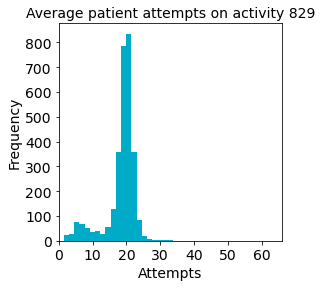

In [55]:
ax = patient_score_mean829['generator_intentos'].plot(kind='hist', fontsize=14, color='#00ABC8', bins=40, figsize=(4,4))
plt.xlabel('Attempts', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
ax.axis(xmin=0)
plt.title('Average patient attempts on activity 829', fontsize=14)

In [56]:
patient_score_mean829['generator_intentos'].describe()

count    3000.000000
mean       18.451907
std         4.652664
min         1.500000
25%        18.000000
50%        19.666667
75%        20.690934
max        63.000000
Name: generator_intentos, dtype: float64

Text(0, 0.5, 'Time')

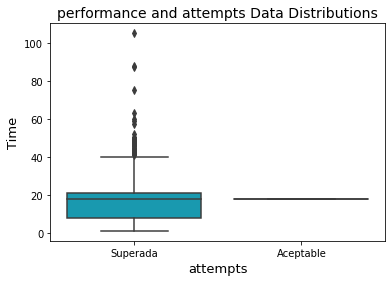

In [57]:
ax = sns.boxplot(x=activity_829['generator_realizacion'], y=activity_829['generator_intentos'], data=activity_829, color='#00ABC8')
ax.set_title('performance and attempts Data Distributions', fontsize=14)
ax.set_xlabel('attempts', fontsize=13)
ax.set_ylabel('Time', fontsize=13)

### Show how many of the total exercises, as a percentage, have been performed within a session.

### stacked bar chart - realizacion and respuesta

In [58]:
activity_829.head()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,generator_errores,generator_tiempo,generator_intentos,generator_omisiones,generator_realizacion,generator_respuesta
0,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,54.2,19,0,Superada,Correcta
1,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,58.1,23,0,Superada,Correcta
2,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,77.4,25,0,Superada,Correcta
3,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,45.5,15,0,Superada,Correcta
4,31,7,4765466.0,829,generator,2022-02-25,47864654,NaN,1.0,0,60.1,23,0,Superada,Correcta


In [59]:
cross_tab_respuesta = pd.crosstab(index=activity_829['activity_id'],
                             columns=activity_829['generator_respuesta'],
                             normalize="index")
cross_tab_respuesta

generator_respuesta,Correcta
activity_id,
829,1.0


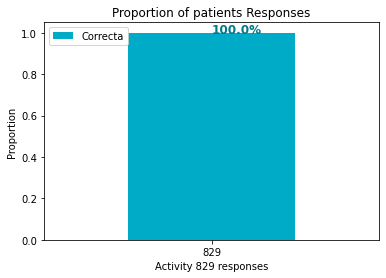

In [60]:
ax = cross_tab_respuesta.plot(kind='bar', stacked=True, color=['#00ABC8', '#b4f4ff'])
plt.legend(loc="upper left", ncol=1)
plt.xlabel("Activity 829 responses")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.ylabel("Proportion")
plt.title('Proportion of patients Responses')

for n, x in enumerate([*cross_tab_respuesta.index.values]):
    for proportion in cross_tab_respuesta.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 0)}%', 
                 color="#00798d",
                 fontsize=12,
                 fontweight="bold")


plt.show()

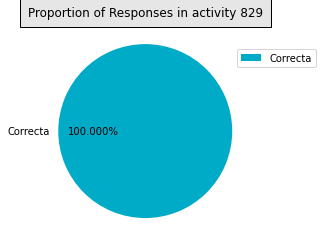

In [61]:
data = cross_tab_respuesta.iloc[0]
labels = ['Correcta']

plt.pie(data, colors=['#00ABC8'], labels=labels, autopct='%.3f%%')
plt.title('Proportion of Responses in activity 829', bbox={'facecolor':'0.9', 'pad':8})
plt.legend(labels, bbox_to_anchor=(0.9,0.9))
plt.show()

In [62]:
cross_tab_real = pd.crosstab(index=activity_829['activity_id'],
                             columns=activity_829['generator_realizacion'],
                             normalize="index")
cross_tab_real

generator_realizacion,Aceptable,Superada
activity_id,,
829,0.000029,0.999971


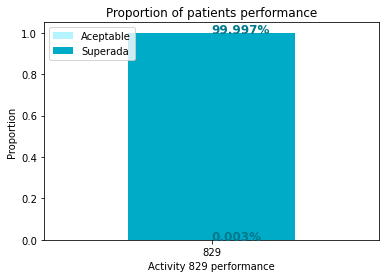

In [63]:
ax = cross_tab_real.plot(kind='bar', stacked=True, color=['#b4f4ff', '#00ABC8'])
plt.legend(loc="upper left", ncol=1)
plt.xlabel("Activity 829 performance")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.ylabel("Proportion")
plt.title('Proportion of patients performance')

for n, x in enumerate([*cross_tab_real.index.values]):
    for proportion in cross_tab_real.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 3)}%', 
                 color="#00798d",
                 fontsize=12,
                 fontweight="bold")

plt.show()

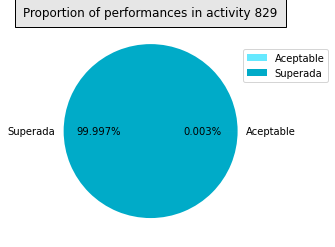

In [64]:
data = cross_tab_real.iloc[0]
labels = ['Aceptable', 'Superada']

plt.pie(data, colors=['#66e9ff','#00abc8'], labels=labels, autopct='%.3f%%')
plt.title('Proportion of performances in activity 829', bbox={'facecolor':'0.9', 'pad':8})
plt.legend(labels, bbox_to_anchor=(0.9,0.9))
plt.show()

#### We have seen that activity 829 has nearly 100% success rate and scores only of 1.0

## Now lets look into another activity 

#### activities with worst scores - from first notebook

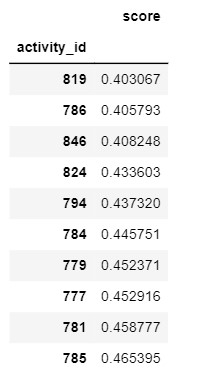

In [65]:
#myImage1 = Image.open("/content/drive/MyDrive/Joshua_NeuronUP/Data/worst_scores.jpg")
myImage1 = Image.open("worst_scores.jpg")
myImage1

# Activity 819

In [66]:
#activity_819 = pd.read_csv('/content/drive/MyDrive/Joshua_NeuronUP/Data/Activities/activity_819.csv')
activity_819 = pd.read_csv('activity_819.csv')
activity_819['activity_id'] = np.repeat(819, len(activity_819))
activity_819.head()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,game_aciertos,game_fase_pantalla_subenivel,game_pantalla_realizacion,game_pantalla_tiempo
0,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.288675,3.0,-1.0,Superada,75.0
1,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.288675,3.0,-1.0,Superada,25.1
2,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.204124,2.0,-1.0,Aceptable,43.5
3,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.288675,3.0,-1.0,Superada,44.7
4,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.204124,2.0,-1.0,Aceptable,36.8


##### Game type = Game

In [67]:
len(activity_819)

93044

In [68]:
times_played_819 = activity_819['patient_id'].value_counts()
times_played819 = pd.DataFrame()
times_played819['times_played'] = times_played_819
times_played819

,times_played
12935,806
78249,716
97788,515
7323,461
3272,460
...,...
95010,1
95097,1
95493,1
95511,1


In [69]:
times_played819.describe()

,times_played
count,5098.000000
mean,18.251079
std,35.543927
min,1.000000
25%,3.000000
50%,8.000000
75%,19.000000
max,806.000000


Text(0.5, 1.0, '\n Distribution of times users played activity 819 \n')

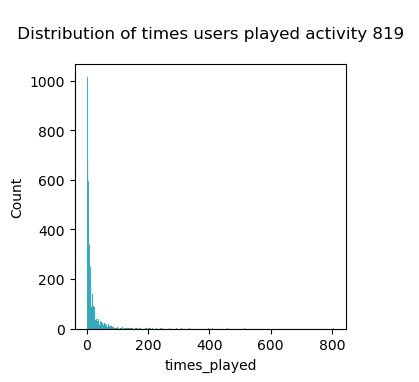

In [70]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 3.5), dpi=100)
data= times_played819['times_played']
p = sns.histplot(data=data, color='#00ABC8')
p.set_title('\n Distribution of times users played activity 819 \n')

In [71]:
#times_played = pd.DataFrame()
#times_played['times_played'] = times_played_819
times_played_over100_819 = times_played819[times_played819['times_played'] > 100]

#times_played = pd.DataFrame()
#times_played['times_played'] = times_played_819
times_played_upto100_819 = times_played819[times_played819['times_played'] <= 100]

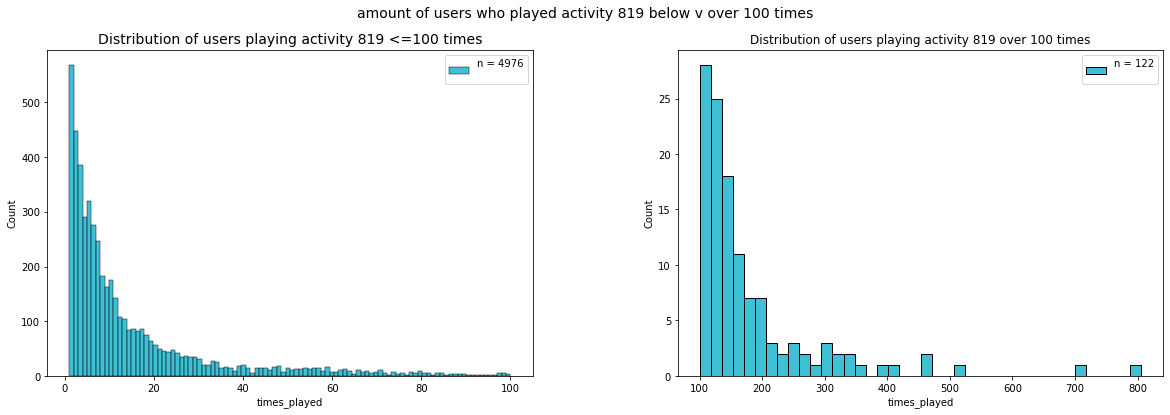

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('amount of users who played activity 819 below v over 100 times ', fontsize=14)
label1 = 'n = ' + str(len(times_played_upto100_819)) + '\n '
label2 = 'n = ' + str(len(times_played_over100_819)) + '\n '
ax = sns.histplot(ax=axes[0], data=times_played_upto100_819['times_played'],bins=100, label=label1, color='#00ABC8')
axes[0].set_title('Distribution of users playing activity 819 <=100 times', fontsize=14, y=1)
ax.legend(loc='best')
ax = sns.histplot(ax=axes[1], data=times_played_over100_819['times_played'],bins=40, label=label2, color='#00ABC8')
axes[1].set_title('Distribution of users playing activity 819 over 100 times', y=1)
ax.legend(loc='best')
plt.subplots_adjust(wspace=0.3)

In [73]:
unique, counts = np.unique(times_played819['times_played'], return_counts=True)
result = np.column_stack((unique, counts)) 
df_count819 = pd.DataFrame(result, columns=['count', 'times_played'])
df_count819

,count,times_played
0,1,568
1,2,447
2,3,385
3,4,291
4,5,319
...,...,...
183,460,1
184,461,1
185,515,1
186,716,1


#### 568 patients played activity 819 just 1 time - the most common (mode). However, some patients did continue to play this activity withsome patients even playing the activity hundreds of times. One patient (patientID = 12935) played activity819 806 times (the most of any patient!).

In [74]:
df_count819.describe()

,count,times_played
count,188.000000,188.000000
mean,122.367021,27.117021
std,116.415760,75.113939
min,1.000000,1.000000
25%,47.750000,1.000000
50%,94.500000,3.000000
75%,155.000000,14.000000
max,806.000000,568.000000


In [75]:
times_played_over100_819.iloc[0]

times_played    806
Name: 12935, dtype: int64

### growth ratio (number of results generated per day/month and year)

In [76]:
activity819 = activity_819.copy()
activity819.head()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,game_aciertos,game_fase_pantalla_subenivel,game_pantalla_realizacion,game_pantalla_tiempo
0,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.288675,3.0,-1.0,Superada,75.0
1,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.288675,3.0,-1.0,Superada,25.1
2,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.204124,2.0,-1.0,Aceptable,43.5
3,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.288675,3.0,-1.0,Superada,44.7
4,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.204124,2.0,-1.0,Aceptable,36.8


In [77]:
activity819['date'] = pd.to_datetime(activity819['date']).copy()
activity819['year']= activity819['date'].dt.year.copy()
activity819['month']= activity819['date'].dt.month.copy()
activity819['day']= activity819['date'].dt.day.copy()
activity819['month_name'] = activity819['date'].dt.month_name().copy()
activity819['day_of_week'] = activity819['date'].dt.dayofweek.copy()
dw_mapping={
    0: 'Monday',
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'} 
activity819['day_of_week_name']=activity819['date'].dt.weekday.map(dw_mapping).copy()
activity819_date= activity819[['patient_id', 'date', 'year', 'month', 'day', 'month_name', 'day_of_week', 'day_of_week_name']]
activity819_date.sort_values(by='date').head()

,patient_id,date,year,month,day,month_name,day_of_week,day_of_week_name
7179,6668,2016-04-11,2016,4,11,April,0,Monday
7160,6667,2016-04-11,2016,4,11,April,0,Monday
7161,6667,2016-04-11,2016,4,11,April,0,Monday
7162,6667,2016-04-11,2016,4,11,April,0,Monday
7163,6667,2016-04-11,2016,4,11,April,0,Monday


In [78]:
by_year819 = activity819.groupby('year')
year_count819 = by_year819.aggregate(np.count_nonzero)
year_count819 = year_count819[['patient_id']]
year_count819 = year_count819.reset_index()
year_count819= year_count819.rename(columns={'patient_id':'Activities_played'})
year_count819

,year,Activities_played
0,2016,4674
1,2017,7558
2,2018,11289
3,2019,16384
4,2020,17439
5,2021,22448
6,2022,13252


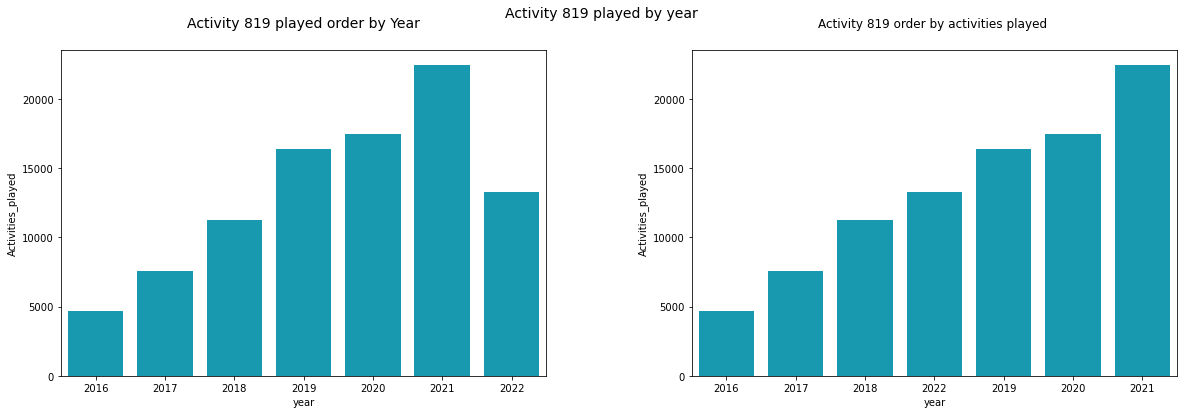

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Activity 819 played by year', fontsize=14)
ax = sns.barplot(ax=axes[0], data=year_count819,x='year',y='Activities_played', order=year_count819.sort_values('year').year, color='#00ABC8')
axes[0].set_title('Activity 819 played order by Year', fontsize=14, y=1.05)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax = sns.barplot(ax=axes[1], data=year_count819,x='year',y='Activities_played', order=year_count819.sort_values('Activities_played').year, color='#00ABC8')
axes[1].set_title('Activity 819 order by activities played ', y=1.05)
plt.subplots_adjust(wspace=0.3)

#### every year, the number of times activity 819 has been played has increased!
** NOTE 2022 data is only upto July, by the end of 2022, it is expected to be the most played year

In [80]:
by_month819 = activity819.groupby('month')
month_count819 = by_month819.aggregate(np.count_nonzero)
month_count819 = month_count819[['patient_id']]
month_count819 = month_count819.reset_index()
month_count819= month_count819.rename(columns={'patient_id':'Activities_played'})
month_count819.sort_values(by='Activities_played')

,month,Activities_played
7,8,4811
8,9,5624
6,7,5982
11,12,6653
0,1,6972
1,2,7417
9,10,7552
3,4,8391
10,11,8567
5,6,9404


In [81]:
by_month_name819 = activity819.groupby('month_name')
month__name_count819 = by_month_name819.aggregate(np.count_nonzero)
month__name_count819 = month__name_count819[['patient_id']]
month__name_count819 = month__name_count819.reset_index()
month__name_count819= month__name_count819.rename(columns={'patient_id':'Activities_played'})
month__name_count819

,month_name,Activities_played
0,April,8391
1,August,4811
2,December,6653
3,February,7417
4,January,6972
5,July,5982
6,June,9404
7,March,9525
8,May,12146
9,November,8567


In [82]:
mean_act_per_month819 = np.mean(month__name_count819['Activities_played'])
mean_act_per_month819 = str(round(mean_act_per_month819, 2))
median_act_per_month819 = np.median(month__name_count819['Activities_played'])
median_act_per_month819 = str(round(median_act_per_month819, 2))
print('Mean number of activity 819 played per month', mean_act_per_month819)
print('Median number of activity 819 played per month', median_act_per_month819)

Mean number of activity 819 played per month 7753.67
Median number of activity 819 played per month 7484.5


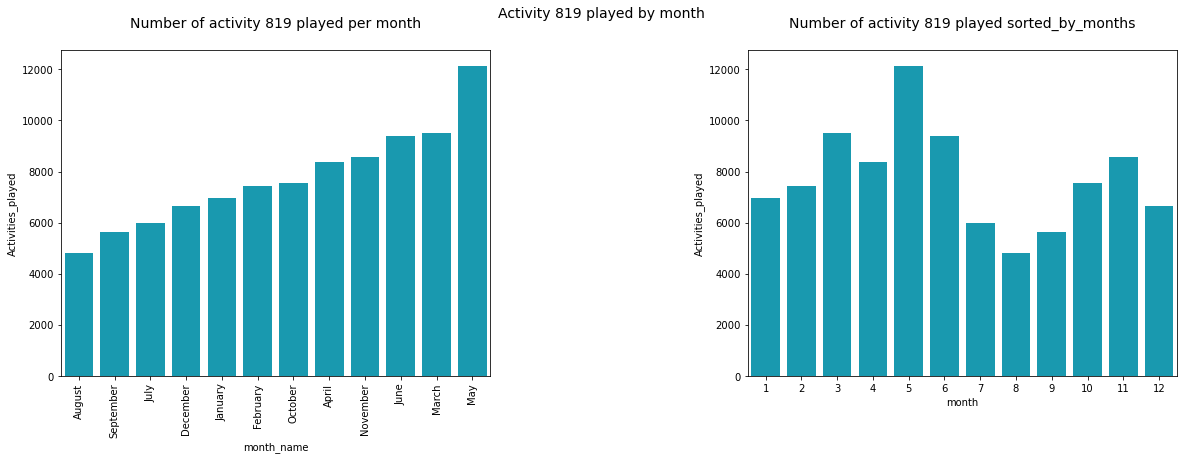

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Activity 819 played by month', fontsize=14)
ax = sns.barplot(ax=axes[0], data=month__name_count819,x='month_name',y='Activities_played', order=month__name_count819.sort_values('Activities_played').month_name, color='#00ABC8')
axes[0].set_title('Number of activity 819 played per month', fontsize=14, y=1.05)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax = sns.barplot(ax=axes[1], data=month_count819,x='month',y='Activities_played', order=month_count819.sort_values('month').month, color='#00ABC8')
axes[1].set_title('Number of activity 819 played sorted_by_months',fontsize=14, y=1.05)
plt.subplots_adjust(wspace=0.6)

#### Activity 819 was least played in the Summer months (July, August) and winter Months (Dec, Jan, Feb).

In [84]:
by_day_of_week819 = activity819.groupby('day_of_week_name')
day_of_week_count819 = by_day_of_week819.aggregate(np.count_nonzero)
day_of_week_count819 = day_of_week_count819.rename(columns={'patient_id':'Activities_played'})
day_of_week_count819 = day_of_week_count819[['Activities_played']].sort_values(by='Activities_played')
day_of_week_count819 = day_of_week_count819.reset_index()
day_of_week_count819

,day_of_week_name,Activities_played
0,Sunday,4416
1,Saturday,4583
2,Friday,13859
3,Wednesday,16544
4,Monday,16724
5,Tuesday,17443
6,Thursday,19475


Text(0.5, 1.05, 'Activity 819 played by DayOfWeek')

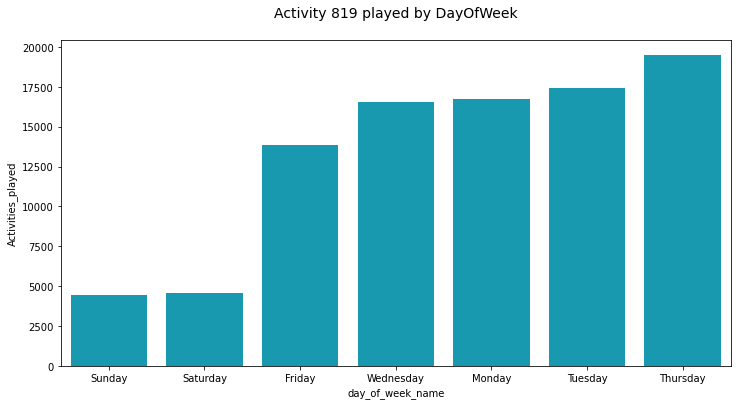

In [85]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
ax = sns.barplot(ax=axes, data=day_of_week_count819,x='day_of_week_name',y='Activities_played', order=day_of_week_count819.sort_values('Activities_played').day_of_week_name, color='#00ABC8')
ax.set_title('Activity 819 played by DayOfWeek', fontsize=14, y=1.05)

#### Activity 819 is played the least on friday, Saturday and Sunday, likely because this is the weekend.

In [86]:
by_day_of_month819 = activity819.groupby('day')
day_of_month_count819 = by_day_of_month819.aggregate(np.count_nonzero)
day_of_month_count819 = day_of_month_count819.rename(columns={'patient_id':'Activities_played'})
day_of_month_count819[['Activities_played']].sort_values(by='Activities_played')

,Activities_played
day,
31,1545
1,2409
29,2464
30,2610
5,2665
2,2682
25,2694
3,2781
19,2841


#### looks like activity 819 is played least at the start and end of the month with the top 8 least played days being 1st,2nd,3rd,5th, 25th, 29th, 30th,31st of the month.
** Note that not all months have a 31st, so this could be why 31st is there

 ### Show result variables

In [87]:
activity_819.head()

,patient_id,center_id,session_id,activity_id,type,date,result_id,difficulty,score,game_aciertos,game_fase_pantalla_subenivel,game_pantalla_realizacion,game_pantalla_tiempo
0,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.288675,3.0,-1.0,Superada,75.0
1,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.288675,3.0,-1.0,Superada,25.1
2,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.204124,2.0,-1.0,Aceptable,43.5
3,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.288675,3.0,-1.0,Superada,44.7
4,36,7,1949898.0,819,game,2020-07-13,17256222,0.083333,0.204124,2.0,-1.0,Aceptable,36.8


#### Score

In [88]:
activity_819['score'].mean()

0.39283119281452306

In [89]:
by_patient819 = activity_819.groupby('patient_id')
patient_score_mean819 = by_patient819.aggregate(np.mean)
patient_score_mean819.sort_values(by='score', ascending=True).head()

,center_id,session_id,activity_id,result_id,difficulty,score,game_aciertos,game_fase_pantalla_subenivel,game_pantalla_tiempo
patient_id,,,,,,,,,
42333,525.0,5.493350e+05,819.0,5239928.0,0.083333,0.204124,2.0,-1.0,28.400000
32126,411.0,3.604957e+06,819.0,39906903.0,0.083333,0.204124,2.0,-1.0,23.966667
87852,1316.0,1.554546e+06,819.0,15345903.0,0.083333,0.204124,2.0,-1.0,21.800000
155259,9761.0,4.926476e+06,819.0,49815438.0,0.083333,0.204124,2.0,-1.0,32.900000
108140,9761.0,4.888751e+06,819.0,49297811.0,0.083333,0.204124,2.0,-1.0,25.533333


In [90]:
patient_score_mean819 = patient_score_mean819.reset_index(drop=False)
patient_score_mean819.head()
patient_score_mean819[patient_score_mean819['patient_id']==36].loc[:, 'score']

0    0.309003
Name: score, dtype: float64

Text(0.5, 1.0, 'Average Patient score on activity 819')

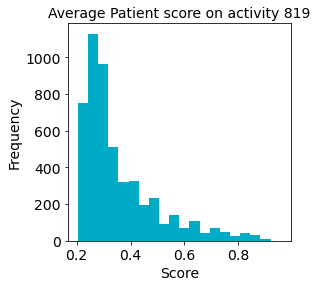

In [91]:
ax = patient_score_mean819['score'].plot(kind='hist', fontsize=14, color='#00ABC8', figsize=(4,4), bins=20)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Average Patient score on activity 819', fontsize=14)

In [92]:
patient_score_mean819['score'].describe()

count    5098.000000
mean        0.353787
std         0.141946
min         0.204124
25%         0.260491
50%         0.293678
75%         0.408248
max         0.957427
Name: score, dtype: float64

### game_fase_pantalla_subenivel

In [93]:
activity_819['game_fase_pantalla_subenivel'].value_counts()

-1.0    85768
 1.0     7260
Name: game_fase_pantalla_subenivel, dtype: int64

In [94]:
by_subenivel = activity_819.groupby('game_fase_pantalla_subenivel')
subenivel_means = by_subenivel.aggregate(np.mean)
subenivel_means

,patient_id,center_id,session_id,activity_id,result_id,difficulty,score,game_aciertos,game_pantalla_tiempo
game_fase_pantalla_subenivel,,,,,,,,,
-1.0,64775.436631,8417.698466,2.066955e+06,819.0,2.031166e+07,0.193388,0.392667,6.052702,52.389079
1.0,61801.977410,7980.207300,1.835969e+06,819.0,1.807803e+07,0.175643,0.394858,5.557163,47.435005


In [95]:
subenivel_means_sd = subenivel_means[['score', 'difficulty']]

Text(0, 0.5, 'Score Mean')

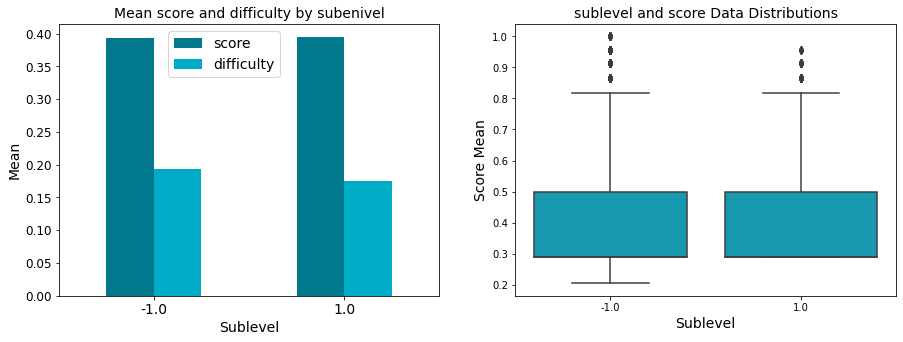

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = subenivel_means_sd.plot(kind='bar', ax=axes[0], color=['#00798d', '#00abc8'], fontsize=12)
ax.set_ylabel('Mean', fontsize=14)
axes[0].set_title('Mean score and difficulty by subenivel', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=14)
ax.set_xlabel('Sublevel', fontsize=14)
ax.set_ylabel('Mean', fontsize=14)
ax.legend(loc='best', bbox_to_anchor=(0.6,1), fontsize=14)
ax = sns.boxplot(ax=axes[1], x=activity_819['game_fase_pantalla_subenivel'], y=activity_819['score'], data=activity_819, color='#00ABC8')
axes[1].set_title('sublevel and score Data Distributions', fontsize=14)
ax.set_xlabel('Sublevel', fontsize=14)
ax.set_ylabel('Score Mean', fontsize=14)

#### No significant difference between the sublevels score or difficulties

### game_pantalla_realizacion

In [97]:
activity_819['game_pantalla_realizacion'].value_counts()

Superada     75990
Aceptable    17054
Name: game_pantalla_realizacion, dtype: int64

In [98]:
cross_tab_real819 = pd.crosstab(index=activity_819['activity_id'],
                             columns=activity_819['game_pantalla_realizacion'],
                             normalize="index")
cross_tab_real819

game_pantalla_realizacion,Aceptable,Superada
activity_id,,
819,0.18329,0.81671


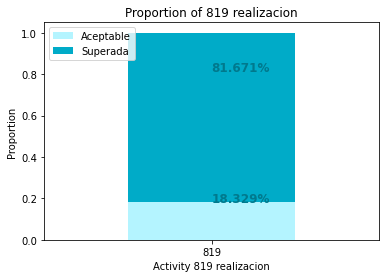

In [99]:
ax = cross_tab_real819.plot(kind='bar', stacked=True, color=['#b4f4ff', '#00ABC8'])
plt.legend(loc="upper left", ncol=1)
plt.xlabel("Activity 819 realizacion")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.ylabel("Proportion")
plt.title('Proportion of 819 realizacion')


for n, x in enumerate([*cross_tab_real819.index.values]):
    for proportion in cross_tab_real819.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 3)}%', 
                 color="#00798d",
                 fontsize=12,
                 fontweight="bold")

plt.show()

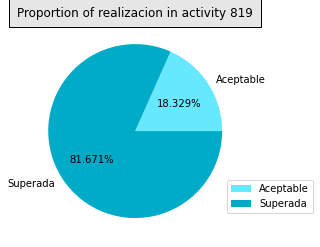

In [100]:
data = cross_tab_real819.iloc[0]
labels = ['Aceptable', 'Superada']

plt.pie(data, colors=['#66e9ff','#00abc8'], labels=labels, autopct='%.3f%%')
plt.title('Proportion of realizacion in activity 819', bbox={'facecolor':'0.9', 'pad':8})
plt.legend(labels, bbox_to_anchor=(0.9,0.3))
plt.show()

In [101]:
by_realiz = activity_819.groupby('game_pantalla_realizacion')
realiz_means = by_realiz.aggregate(np.mean)
realiz_means_sd = realiz_means[['score', 'difficulty']]

In [102]:
realiz_means_sd = realiz_means[['score', 'difficulty']]

Text(0, 0.5, 'Score Mean')

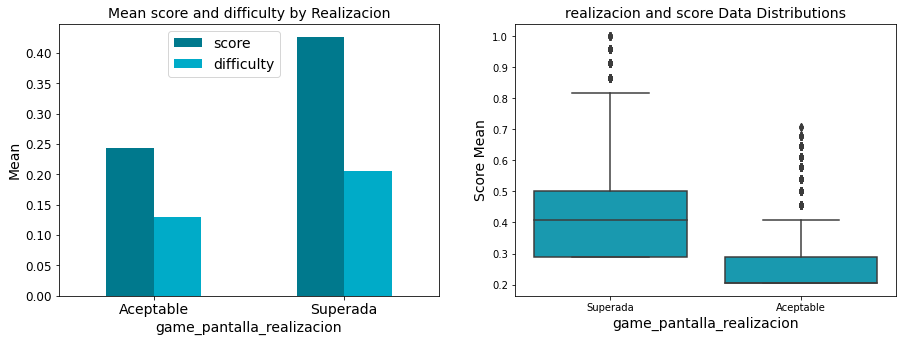

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = realiz_means_sd.plot(kind='bar', ax=axes[0], color=['#00798d', '#00abc8'], fontsize=12)
ax.set_ylabel('Mean', fontsize=14)
axes[0].set_title('Mean score and difficulty by Realizacion', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=14)
ax.set_xlabel('game_pantalla_realizacion', fontsize=14)
ax.set_ylabel('Mean', fontsize=14)
ax.legend(loc='best', bbox_to_anchor=(0.6,1), fontsize=14)
ax = sns.boxplot(ax=axes[1], x=activity_819['game_pantalla_realizacion'], y=activity_819['score'], data=activity_819, color='#00ABC8')
axes[1].set_title('realizacion and score Data Distributions', fontsize=14)
ax.set_xlabel('game_pantalla_realizacion', fontsize=14)
ax.set_ylabel('Score Mean', fontsize=14)

Text(0, 0.5, 'tiempo Mean')

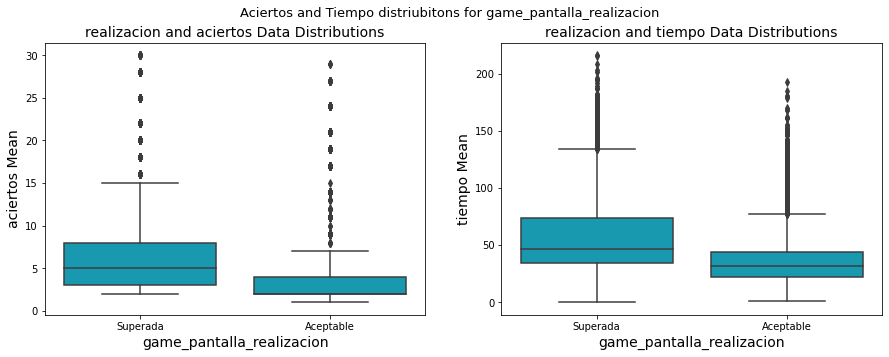

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Aciertos and Tiempo distriubitons for game_pantalla_realizacion', fontsize=13)
ax = sns.boxplot(ax=axes[0], x=activity_819['game_pantalla_realizacion'], y=activity_819['game_aciertos'], data=activity_819, color='#00ABC8')
axes[0].set_title('realizacion and aciertos Data Distributions', fontsize=14)
ax.set_xlabel('game_pantalla_realizacion', fontsize=14)
ax.set_ylabel('aciertos Mean', fontsize=14)
ax = sns.boxplot(ax=axes[1], x=activity_819['game_pantalla_realizacion'], y=activity_819['game_pantalla_tiempo'], data=activity_819, color='#00ABC8')
axes[1].set_title('realizacion and tiempo Data Distributions', fontsize=14)
ax.set_xlabel('game_pantalla_realizacion', fontsize=14)
ax.set_ylabel('tiempo Mean', fontsize=14)

#### patients that got Superada had higher average score, higher average aciertos, higher average game_pantalla_tiempo and higher average difficulty than patients who got Aceptable

### Tiempo

Text(0.5, 1.0, 'Average time on activity 819')

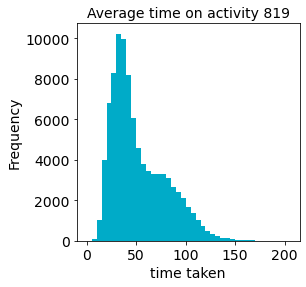

In [105]:
#bins = np.arange(0, 210, 5)
ax = activity_819['game_pantalla_tiempo'].plot(kind='hist', fontsize=14, color='#00ABC8', bins=bins, figsize=(4,4))
plt.xlabel('time taken', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Average time on activity 819', fontsize=14)

In [106]:
activity_819['game_pantalla_tiempo'].describe()

count    93036.000000
mean        52.001074
std         27.351342
min          0.000000
25%         31.300000
50%         43.500000
75%         70.000000
max        216.000000
Name: game_pantalla_tiempo, dtype: float64

##### Average time to complete activity 819 is 52s

In [107]:
np.count_nonzero(activity_819['game_pantalla_tiempo'] > 150)

167

In [108]:
np.count_nonzero(activity_819['game_pantalla_tiempo'] < 10)

94

#### 94 patients completed activity 819 in under 10s -> these patients likely didn't properly participate in the activity to their fullest as this is too short a time 

Activity 819 Domains

In [109]:
areas_df[areas_df['activity_id']==819]

,activity_id,parent_id,area_id,parent_name,name,position
391,819,52,59,Executive Functions,Planning,1
392,819,14,21,Attention,Processing Speed,2
393,819,49,50,Visuospatial Skills,Spatial Relation,3
394,819,14,16,Attention,Sustained Attention,4


Activity 819 works on 4 parent domains: Executive functions (planning), Attention (processing speed), Visuospatial skills (spatial relation) and Attention (sustained attention)!

### 819 Difficulties

In [110]:
activity_819['difficulty'].value_counts()

0.083333    45205
0.166667    18435
0.250000    12255
0.333333     5876
0.416667     4272
0.500000     2963
0.583333     1652
0.666667     1003
0.750000      758
0.833333      418
0.916667      187
1.000000       20
Name: difficulty, dtype: int64

In [111]:
cross_tab_difficulty = pd.crosstab(index=activity_819['activity_id'],
                             columns=activity_819['difficulty'],
                             normalize="index")
cross_tab_difficulty

difficulty,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,0.833333,0.916667,1.000000
activity_id,,,,,,,,,,,,
819,0.485845,0.198132,0.131712,0.063153,0.045914,0.031845,0.017755,0.01078,0.008147,0.004492,0.00201,0.000215


In [112]:
cross_tab_difficulty_df = pd.DataFrame()
cross_tab_difficulty_df['difficulty'] = cross_tab_difficulty.columns
cross_tab_difficulty_df['difficulty'] = cross_tab_difficulty_df['difficulty'].round(2)
cross_tab_difficulty_df

,difficulty
0,0.08
1,0.17
2,0.25
3,0.33
4,0.42
5,0.50
6,0.58
7,0.67
8,0.75
9,0.83


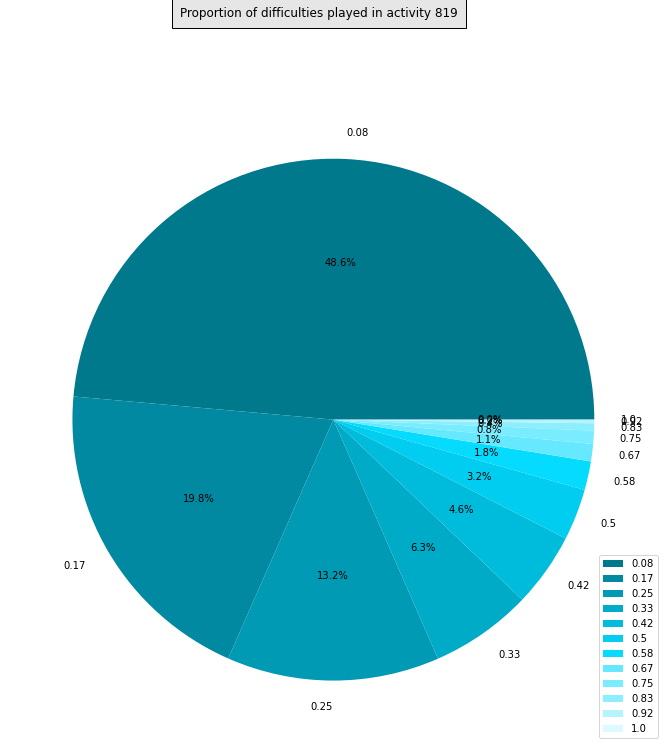

In [113]:
data = cross_tab_difficulty.iloc[0]
labels = cross_tab_difficulty_df['difficulty']
colors = sns.color_palette(palette=neuronUP_12colors)
fig, axes = plt.subplots(1, 1, figsize=(16, 12))
fig.suptitle('Proportion of difficulties played in activity 819', bbox={'facecolor':'0.9', 'pad':8})
ax = plt.pie(data, colors=colors, labels=labels, autopct='%.1f%%')
plt.legend(labels, bbox_to_anchor=(0.9,0.3))
plt.show()

#### the easier difficulties were played more than the harder difficulties

In [114]:
by_difficulty = activity_819.groupby('difficulty')
difficulty_means = by_difficulty.aggregate(np.mean)
diff_sorted = difficulty_means.sort_values(by='game_pantalla_tiempo').reset_index()
diff_sorted['difficulty'] = round(diff_sorted['difficulty'], 2)
diff_sorted

,difficulty,patient_id,center_id,session_id,activity_id,result_id,score,game_aciertos,game_fase_pantalla_subenivel,game_pantalla_tiempo
0,0.08,65572.630550,9129.158390,2.016808e+06,819.0,1.988450e+07,0.265090,3.020839,-0.832153,33.640701
1,0.17,62191.301871,8133.135178,1.913510e+06,819.0,1.892052e+07,0.393408,4.875882,-0.823016,45.634359
2,0.25,62785.775765,7857.291065,2.196323e+06,819.0,2.154016e+07,0.488600,7.922154,-0.890648,70.956101
3,0.33,61015.808033,7530.157931,2.117514e+06,819.0,2.071614e+07,0.565119,9.927672,-0.844085,82.399285
4,0.42,62385.024813,8195.927200,2.102876e+06,819.0,2.023889e+07,0.631203,11.924391,-0.850152,90.493516
5,1.00,44143.350000,1308.200000,2.437555e+06,819.0,2.329074e+07,0.956066,29.850000,-1.000000,98.595000
6,0.83,69231.334928,3315.708134,2.449000e+06,819.0,2.354470e+07,0.893681,24.928230,-0.904306,99.028469
7,0.50,67137.275059,8328.563955,2.158838e+06,819.0,2.098684e+07,0.692987,14.931826,-0.887276,102.501755
8,0.75,80499.552770,4135.688654,2.564427e+06,819.0,2.492844e+07,0.852975,21.948549,-0.860158,102.604881
9,0.67,77973.830508,4038.245264,2.359178e+06,819.0,2.249935e+07,0.800045,19.916251,-0.884347,107.971286


[Text(0, 0, '0.08'),
 Text(1, 0, '0.17'),
 Text(2, 0, '0.25'),
 Text(3, 0, '0.33'),
 Text(4, 0, '0.42'),
 Text(5, 0, '0.5'),
 Text(6, 0, '0.58'),
 Text(7, 0, '0.67'),
 Text(8, 0, '0.75'),
 Text(9, 0, '0.83'),
 Text(10, 0, '0.92'),
 Text(11, 0, '1.0')]

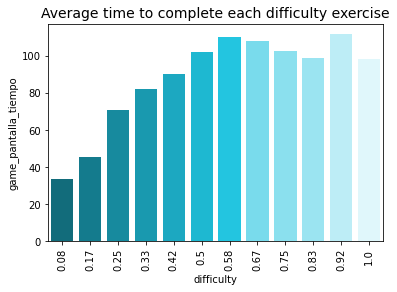

In [115]:
ax = sns.barplot(data=diff_sorted,x='difficulty',y='game_pantalla_tiempo', order=diff_sorted.sort_values('difficulty', ascending=True).difficulty, palette=neuronUP_12colors)
ax.set_title('Average time to complete each difficulty exercise', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

#### can see that as the difficulty increases, so does the time

[Text(0, 0, '0.08'),
 Text(1, 0, '0.17'),
 Text(2, 0, '0.25'),
 Text(3, 0, '0.33'),
 Text(4, 0, '0.42'),
 Text(5, 0, '0.5'),
 Text(6, 0, '0.58'),
 Text(7, 0, '0.67'),
 Text(8, 0, '0.75'),
 Text(9, 0, '0.83'),
 Text(10, 0, '0.92'),
 Text(11, 0, '1.0')]

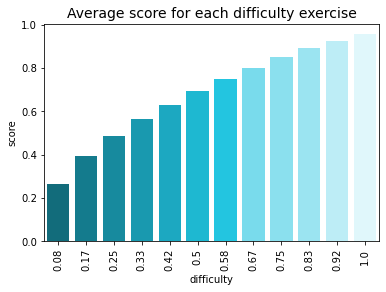

In [116]:
ax = sns.barplot(data=diff_sorted,x='difficulty',y='score', order=diff_sorted.sort_values('difficulty', ascending=True).difficulty, palette=neuronUP_12colors)
ax.set_title('Average score for each difficulty exercise', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

#### As the difficuly increases, so does the score - is score multiplied by difficulty rating?

# USING FUNCTIONS - generalizing code to any activity

## Importing activity function

In [117]:
def import_activity(x):
    activity_x = pd.read_csv('activity_%d.csv' % x)
    #activity_x = pd.read_csv('/content/drive/MyDrive/Joshua_NeuronUP/Data/Activities/activity_%d.csv' % x)
    
    activity_x['activity_id'] = np.repeat(x, len(activity_x))
    return activity_x





##  activity type function

In [118]:
def activity_type(x):
  activity_x = import_activity(x)
  if activity_x ['type'].iloc[0] == 'game':
    return 'Game type'
  elif activity_x ['type'].iloc[0] == 'card':
    return 'Card type'
  else:
    return 'Generator type'

In [119]:
activity_type(634)

'Generator type'

In [120]:
activity_type(821)

'Game type'

## times played Histogram function

In [121]:
def times_played(x):
  activity_x = import_activity(x)
  print('total times played: ', len(activity_x))
  patient_times_played = activity_x['patient_id'].value_counts()
  times_played = pd.DataFrame()
  times_played['times_played'] = patient_times_played
  times_played = pd.DataFrame()
  times_played['times_played'] = patient_times_played
  times_played_over60 = times_played[times_played['times_played'] > 60]
  times_played = pd.DataFrame()
  times_played['times_played'] = patient_times_played
  times_played_upto60 = times_played[times_played['times_played'] <= 60]
  fig, axes = plt.subplots(1, 2, figsize=(20, 6))
  fig.suptitle('amount of users who played activity below v over 60 times ', fontsize=14)
  label1 = 'n (users)= ' + str(len(times_played_upto60)) + '\n '
  label2 = 'n (users) = ' + str(len(times_played_over60)) + '\n '
  ax = sns.histplot(ax=axes[0], data=times_played_upto60['times_played'], label=label1, color='#00ABC8')
  axes[0].set_title('Distribution of users playing activity %d <=60 times' %x, fontsize=14, y=1)
  ax.legend(loc='best')
  ax = sns.histplot(ax=axes[1], data=times_played_over60['times_played'],label=label2, color='#00ABC8')
  axes[1].set_title('Distribution of users playing activity %d over 60 times'%x, y=1)
  ax.legend(loc='best')
  plt.subplots_adjust(wspace=0.3)
  unique, counts = np.unique(times_played['times_played'], return_counts=True)
  result = np.column_stack((unique, counts)) 
  df_count = pd.DataFrame(result, columns=['count', 'times_played'])
  return df_count.describe()
  

total times played:  33326


,count,times_played
count,104.000000,104.000000
mean,69.509615,29.259615
std,80.568248,73.890367
min,1.000000,1.000000
25%,26.750000,1.000000
50%,52.500000,3.000000
75%,85.250000,14.000000
max,704.000000,487.000000


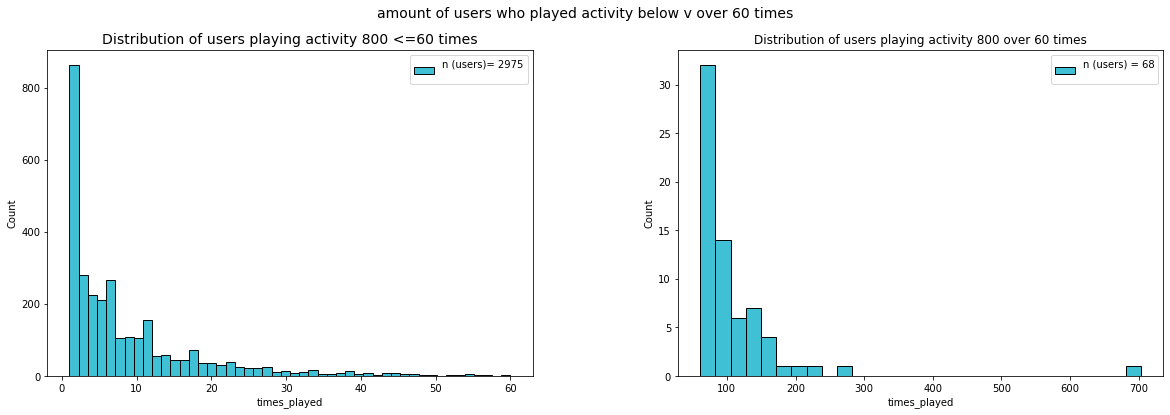

In [122]:
times_played(800)


## times played by year bar chart function

In [123]:
def times_played_year (x):
  activity_x = import_activity(x)
  activity_x['date'] = pd.to_datetime(activity_x['date']).copy()
  activity_x['year']= activity_x['date'].dt.year.copy()
             
  by_yearx = activity_x.groupby('year')
  year_countx = by_yearx.aggregate(np.count_nonzero)
  year_countx = year_countx[['patient_id']]
  year_countx= year_countx.rename(columns={'patient_id':'Activities_played'}) 
  print(year_countx.sort_values(by='Activities_played', ascending=False))

  year_countx = year_countx.reset_index()
  fig, axes = plt.subplots(1, 2, figsize=(20, 6))
  fig.suptitle('Activity %d played by year'%x, fontsize=14)
  ax = sns.barplot(ax=axes[0], data=year_countx,x='year',y='Activities_played', order=year_countx.sort_values('year').year, color='#00ABC8')
  axes[0].set_title('Activity %d played order by Year'%x, fontsize=14, y=1.05)
  ax = sns.barplot(ax=axes[1], data=year_countx,x='year',y='Activities_played', order=year_countx.sort_values('Activities_played').year, color='#00ABC8')
  axes[1].set_title('Activity %d order by activities played'%x, fontsize=14, y=1.05)
  plt.subplots_adjust(wspace=0.3)
  
  return


      Activities_played
year                   
2021              45944
2022              28713
2020              27892
2019              10690
2018               5050
2017               4969
2016               3096
2015               2345
2014               1064


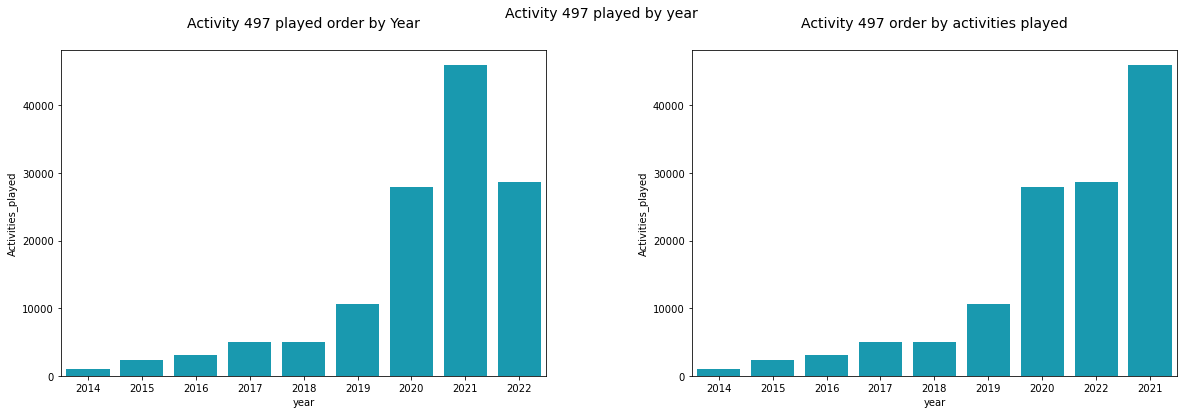

In [124]:
times_played_year(497)

## times played by month bar chart function

In [125]:
def times_played_month(x):
  activity_x = import_activity(x)

  activity_x['date'] = pd.to_datetime(activity_x['date']).copy()

  activity_x['month']= activity_x['date'].dt.month.copy()

  activity_x['month_name'] = activity_x['date'].dt.month_name().copy()

  by_monthx = activity_x.groupby('month')
  month_countx = by_monthx.aggregate(np.count_nonzero)
  month_countx = month_countx[['patient_id']]
  month_countx = month_countx.reset_index()
  month_countx= month_countx.rename(columns={'patient_id':'Activities_played'})
  
  by_month_namex = activity_x.groupby('month_name')
  month__name_countx = by_month_namex.aggregate(np.count_nonzero)
  month__name_countx = month__name_countx[['patient_id']]
  month__name_countx = month__name_countx.reset_index()
  month__name_countx= month__name_countx.rename(columns={'patient_id':'Activities_played'})

  mean_act_per_monthx = np.mean(month__name_countx['Activities_played'])
  mean_act_per_monthx = str(round(mean_act_per_monthx, 2))
  median_act_per_monthx = np.median(month__name_countx['Activities_played'])
  median_act_per_monthx = str(round(median_act_per_monthx, 2))
  print('Mean number of activity %d played per month' % x, mean_act_per_monthx)
  print('Median number of activity %d played per month' % x, median_act_per_monthx)
  print('\n', month__name_countx.sort_values(by='Activities_played', ascending=False))

  fig, axes = plt.subplots(1, 2, figsize=(20, 6))
  fig.suptitle('Activity %d played by month' % x, fontsize=14)
  ax = sns.barplot(ax=axes[0], data=month__name_countx,x='month_name',y='Activities_played', order=month__name_countx.sort_values('Activities_played').month_name, color='#00ABC8')
  axes[0].set_title('Number of activity %d played per month' %x, fontsize=14, y=1.05)
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
  ax = sns.barplot(ax=axes[1], data=month_countx,x='month',y='Activities_played', order=month_countx.sort_values('month').month, color='#00ABC8')
  axes[1].set_title('Number of activity %d played sorted_by_months'% x,fontsize=14, y=1.05)
  plt.subplots_adjust(wspace=0.6)
  return

Mean number of activity 634 played per month 42643.25
Median number of activity 634 played per month 41580.5

    month_name  Activities_played
8         May              53938
0       April              50415
6        June              50342
7       March              50259
3    February              49785
4     January              41681
9    November              41480
10    October              40873
5        July              36967
2    December              36578
11  September              34549
1      August              24852


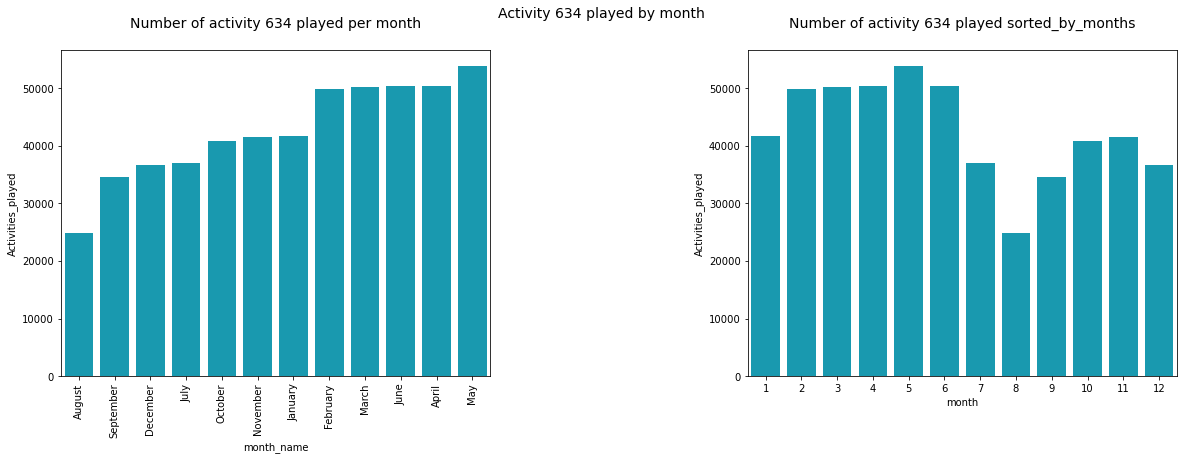

In [126]:
times_played_month(634)

## times played by day of week bar chart function


In [127]:
def times_played_dayofweek(x):
  activity_x = import_activity(x)

  activity_x['date'] = pd.to_datetime(activity_x['date']).copy()
  activity_x['day_of_week'] = activity_x['date'].dt.dayofweek.copy()
  dw_mapping={
      0: 'Monday',
      1: 'Tuesday', 
      2: 'Wednesday', 
      3: 'Thursday', 
      4: 'Friday',
      5: 'Saturday', 
      6: 'Sunday'} 
  activity_x['day_of_week_name']=activity_x['date'].dt.weekday.map(dw_mapping).copy()

  by_day_of_weekx = activity_x.groupby('day_of_week_name')
  day_of_week_countx = by_day_of_weekx.aggregate(np.count_nonzero)
  day_of_week_countx = day_of_week_countx.rename(columns={'patient_id':'Activities_played'})
  day_of_week_countx = day_of_week_countx[['Activities_played']].sort_values(by='Activities_played', ascending=False)
  print(day_of_week_countx)
  day_of_week_countx = day_of_week_countx.reset_index()
  fig, axes = plt.subplots(1, 1, figsize=(12, 6))
  ax = sns.barplot(ax=axes, data=day_of_week_countx,x='day_of_week_name',y='Activities_played', order=day_of_week_countx.sort_values('Activities_played').day_of_week_name, color='#00ABC8')
  ax.set_title('Activity %d played by DayOfWeek'%x, fontsize=14, y=1.05)

  return


                  Activities_played
day_of_week_name                   
Tuesday                       83687
Monday                        80199
Wednesday                     79540
Thursday                      77216
Friday                        57696
Saturday                      21493
Sunday                        15120


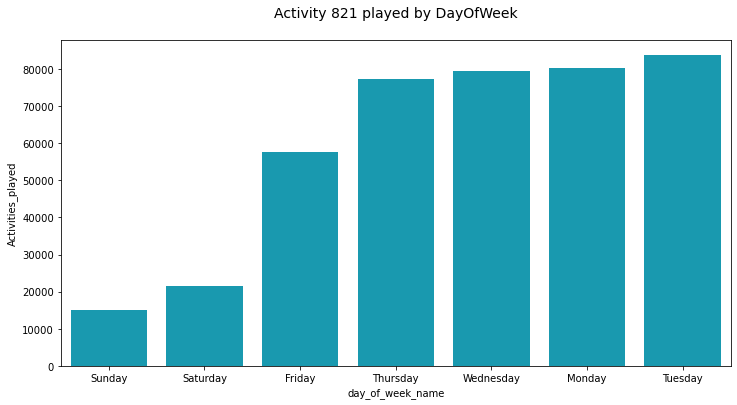

In [128]:
times_played_dayofweek(821)

## Show activity result variables function


In [129]:
def show_result_variables(x):
  activity_x = import_activity(x)
  result_variables = pd.DataFrame()
  result_variables['Activity %d result variables' % x] = activity_x.columns[8:-1]

  return result_variables

In [130]:
show_result_variables(800)

,Activity 800 result variables
0,score
1,card_errores
2,card_tiempo
3,card_intentos
4,card_realizacion


In [131]:
show_result_variables(804)

,Activity 804 result variables
0,score
1,generator_errores
2,generator_tiempo
3,generator_intentos
4,generator_realizacion
5,generator_respuesta
6,generator_cantidad_pedida


## Show activity domains function


In [132]:
def activity_domains(x):
  activity_x = import_activity(x)
  #areas_df = pd.read_csv('/content/drive/MyDrive/Joshua_NeuronUP/Data/areas.csv')
  areas_df = pd.read_csv('areas.csv')  
  return areas_df[areas_df['activity_id']==x]

In [133]:
activity_domains(821)

,activity_id,parent_id,area_id,parent_name,name,position
397,821,14,21,Attention,Processing Speed,1
398,821,52,59,Executive Functions,Planning,2
399,821,52,53,Executive Functions,Working M.,3


In [134]:
activity_domains(814)

,activity_id,parent_id,area_id,parent_name,name,position
377,814,52,59,Executive Functions,Planning,1
378,814,37,41,Praxis,Visoconstructive Praxis,2
379,814,49,50,Visuospatial Skills,Spatial Relation,3


In [135]:
print('%(language)s has %(number)03d quote types.' %
      {'language': "Python", "number": 2})

Python has 002 quote types.


## Show activity difficulty levels function


In [136]:
def difficulty_levels(x):
  activity_x = import_activity(x)
  if activity_type(x) == 'Generator type':
    return 'Generator type activities do not have difficulty levels'
  else:
    cross_tab_difficulty = pd.crosstab(index=activity_x['activity_id'],
                             columns=activity_x['difficulty'],
                             normalize="index")
  
    cross_tab_difficulty_df = pd.DataFrame()
    cross_tab_difficulty_df['difficulty'] = cross_tab_difficulty.columns
    cross_tab_difficulty_df['difficulty'] = cross_tab_difficulty_df['difficulty'].round(2)
    
    neuronUP_12colors = ['#00798d','#0089a1','#009ab4','#00abc8','#00bcdc','#00cdef','#04dbff','#66e9ff','#7aecff','#8deeff', '#b4f4ff', '#dcfaff']
    data = cross_tab_difficulty.iloc[0]
    labels = cross_tab_difficulty_df['difficulty']
    colors = sns.color_palette(palette=neuronUP_12colors)
    if len(cross_tab_difficulty.columns) > 6:
      fig, axes = plt.subplots(1, 1, figsize=(20,9))
      fig.suptitle('Proportion of difficulties played in activity %d \n' %x,y=1.05, bbox={'facecolor':'0.9', 'pad':8})
      print('n = %d' % activity_x['difficulty'].sum() )
      ax = plt.pie(data, colors=colors, labels=labels, autopct='%.1f%%')
      plt.legend(labels, bbox_to_anchor=(0.9,0.3))
      plt.show()
    else:
      fig, axes = plt.subplots(1, 1)
      fig.suptitle('Proportion of difficulties played in activity %(activity_number)d \n n = %(n)d'% {'activity_number': x, 'n': activity_x['difficulty'].sum()},y=1.05, bbox={'facecolor':'0.9', 'pad':8})
      ax = plt.pie(data, colors=colors, labels=labels, autopct='%.1f%%')
      plt.legend(labels, bbox_to_anchor=(1,0.4))
      plt.show()

  
    return pd.crosstab(index=activity_x['activity_id'],
                             columns=activity_x['difficulty'])
  
  
   

In [137]:
difficulty_levels(815)

'Generator type activities do not have difficulty levels'

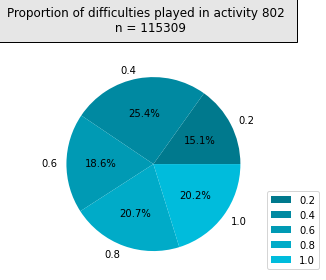

difficulty,0.2,0.4,0.6,0.8,1.0
activity_id,,,,,
802,28571,48007,35027,39084,38109


In [138]:
difficulty_levels(802)


## Show activity mean scores for each difficulty level function


In [139]:
def difficulty_scores(x):
  activity_x = import_activity(x)
  if activity_type(x) == 'Generator type':
    return 'Generator type activities do not have difficulty levels'
  else:
    by_difficulty = activity_x.groupby('difficulty')
    difficulty_means = by_difficulty.aggregate(np.mean)
    diff_reset = difficulty_means.reset_index()
    diff_reset['difficulty'] = round(diff_reset['difficulty'], 2)
    ax = sns.barplot(data=diff_reset,x='difficulty',y='score', order=diff_reset.sort_values('difficulty', ascending=True).difficulty, palette=neuronUP_12colors)
    ax.set_title('Average score for each difficulty exercise on activity %d'%x, fontsize=14)
    ax.set_ylabel('Score Mean')
    return


In [140]:
difficulty_scores(804)

'Generator type activities do not have difficulty levels'

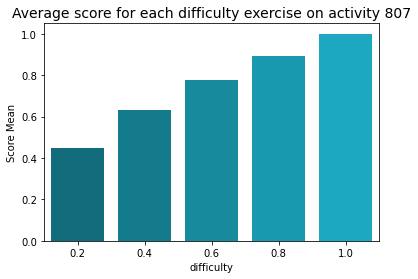

In [141]:
difficulty_scores(807)

## Show activity mean time to complete for each difficulty level function


In [142]:
def difficulty_times(x):
  activity_x = import_activity(x)
  if activity_type(x) == 'Game type':
    by_difficulty = activity_x.groupby('difficulty')
    difficulty_means = by_difficulty.aggregate(np.mean)
    diff_reset = difficulty_means.reset_index()
    diff_reset['difficulty'] = round(diff_reset['difficulty'], 2)
    ax = sns.barplot(data=diff_reset,x='difficulty',y='game_pantalla_tiempo', order=diff_reset.sort_values('difficulty', ascending=True).difficulty, palette=neuronUP_12colors)
    ax.set_title('Average time to complete each difficulty exercise on activity %d'%x, fontsize=14)
    return
  elif activity_type(x) == 'Card type':
    by_difficulty = activity_x.groupby('difficulty')
    difficulty_means = by_difficulty.aggregate(np.mean)
    diff_reset = difficulty_means.reset_index()
    diff_reset['difficulty'] = round(diff_reset['difficulty'], 2)
    ax = sns.barplot(data=diff_reset,x='difficulty',y='card_tiempo', order=diff_reset.sort_values('difficulty', ascending=True).difficulty, palette=neuronUP_12colors)
    ax.set_title('Average time to complete each difficulty exercise on activity %d'%x, fontsize=14)
  else:
    print( 'Generator type activities do not have difficulty levels, this is the average activity time.')
    activity_x1 = activity_x[activity_x['generator_tiempo']<1500]
    ax = activity_x1['generator_tiempo'].plot(kind='hist', fontsize=14, bins=50, color='#00ABC8')
    plt.xlabel('time taken', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    if activity_x['generator_tiempo'].describe().loc['max'] > 1500:
        plt.title('Average time on activity %d (outliers over 1500s removed)'%x, fontsize=14)
    else:
        plt.title('Average time on activity %d'%x, fontsize=14)
    return activity_x['generator_tiempo'].describe()

  


  

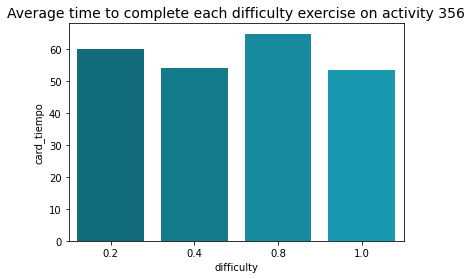

In [143]:
difficulty_times(356)

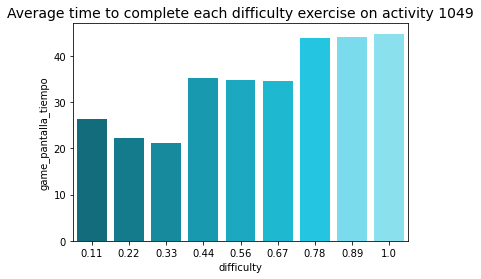

In [144]:
difficulty_times(1049)

Generator type activities do not have difficulty levels, this is the average activity time.


count    8437.000000
mean       39.403698
std        35.118911
min         1.700000
25%        17.900000
50%        28.000000
75%        48.500000
max       345.900000
Name: generator_tiempo, dtype: float64

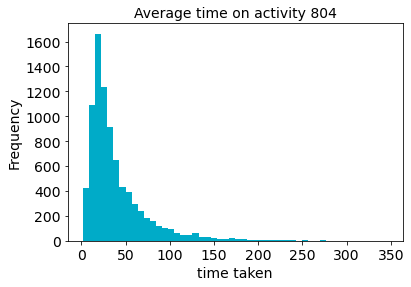

In [145]:
difficulty_times(804)

## Show activity and user scores function


In [146]:
def scores(x):
  activity_x = import_activity(x)
  by_patientx = activity_x.groupby('patient_id')
  label = 'n = ' + str(len(activity_x)) + '\n '
  patient_score_meanx = by_patientx.aggregate(np.mean)
  fig, axes = plt.subplots(1, 2, figsize=(20,6))
  fig.suptitle('Activity %d: Activity score distribution vs average user scores '%x, fontsize=14, y=1.05)
  ax = activity_x['score'].plot(ax=axes[0], label=label, kind='hist',bins=12, fontsize=14, color='#00ABC8')
  axes[0].set_title('Activity %d score distribution'%x)
  ax.set_xlabel('Score', fontsize=13)
  ax.legend(loc='best')
  ax = patient_score_meanx['score'].plot(ax=axes[1], label=label, kind='hist', bins=30, fontsize=14, color='#00ABC8')
  axes[1].set_title('Average Patient score on activity %d'%x)
  ax.set_xlabel('Score', fontsize=13)
  ax.legend(loc='best')
  plt.subplots_adjust(wspace=0.5)
  return

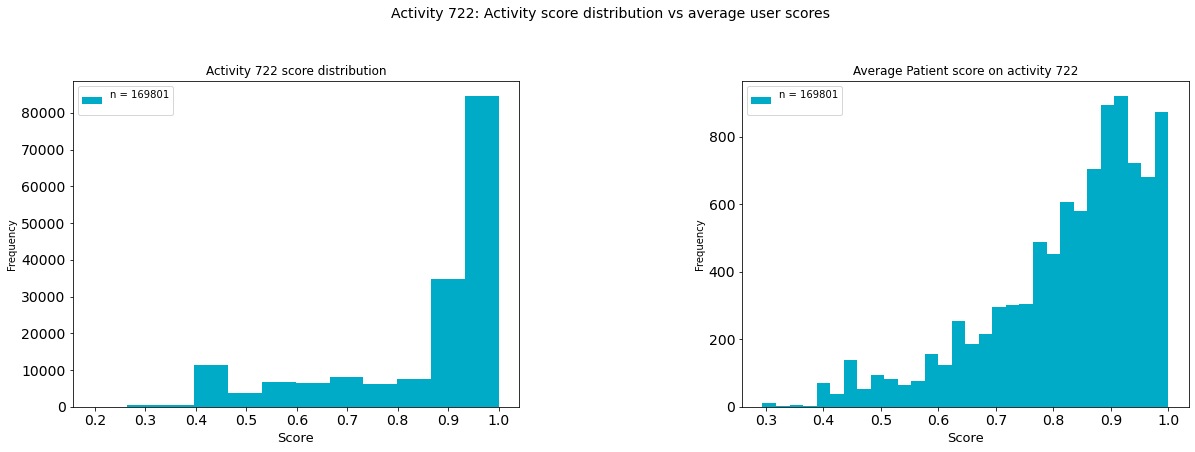

In [147]:
scores(722)

In [148]:
neuronUP_12colors

['#00798d',
 '#0089a1',
 '#009ab4',
 '#00abc8',
 '#00bcdc',
 '#00cdef',
 '#04dbff',
 '#66e9ff',
 '#7aecff',
 '#8deeff',
 '#b4f4ff',
 '#dcfaff']

## Show patient score on certain activity function


In [149]:
def score_activity_patient(x, y):
  activity_x = import_activity(x)
  by_patientx = activity_x.groupby('patient_id')
  patient_score_meanx = by_patientx.aggregate(np.mean)
  patient_score_meanx = patient_score_meanx.sort_values(by='score', ascending=False)
  patient_score_meanx_reset = patient_score_meanx.reset_index(drop=False)
  patient_y_score = patient_score_meanx_reset[patient_score_meanx_reset['patient_id']==y].loc[:, 'score']

  ax = patient_score_meanx_reset['score'].plot(kind='hist', fontsize=14, color='#00ABC8', bins=30)
  plt.xlabel('Activity %d - Average patient scores'%x, fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.plot(patient_y_score, 25 , 'o', markersize = 10,color = 'red', label = 'Patient %d average score'%y)
  plt.title('Activity %(activity_id)d \n Patient %(patient_id)d average score compared to patient population'% {'activity_id': x, 'patient_id': y},y=1.05, fontsize=14)
  ax.legend(loc='best')
  print('n = ', len(activity_x))
  print('%d patient rank and average score: (0th rank is highest score)\n'%y, patient_y_score)
  return

n =  93044
87288 patient rank and average score: (0th rank is highest score)
 49    0.824036
Name: score, dtype: float64


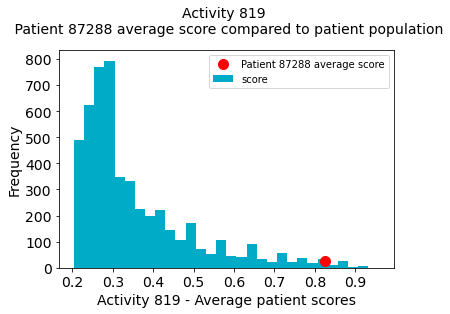

In [150]:
score_activity_patient(819, 87288)

n =  321746
48782 patient rank and average score: (0th rank is highest score)
 1414    0.894427
Name: score, dtype: float64


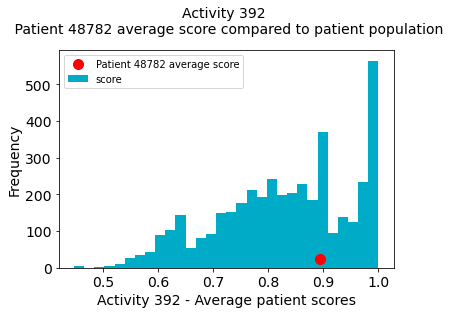

In [151]:
score_activity_patient(392, 48782)

## Show activity success v errors function


In [152]:
def activity_time(x):
  activity_x = import_activity(x)
  if activity_type(x) == 'Game type':
    activity_x1 = activity_x[activity_x['game_pantalla_tiempo']<1500]
    ax = activity_x1['game_pantalla_tiempo'].plot(kind='hist', fontsize=14, bins=50, color='#00ABC8')
    plt.xlabel('time taken', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    if activity_x['game_pantalla_tiempo'].describe().loc['max'] > 1500:
        plt.title('Average time on activity %d (outliers over 1500s removed)'%x, fontsize=14)
    else:
        plt.title('Average time on activity %d'%x, fontsize=14)
    return activity_x['game_pantalla_tiempo'].describe()

  elif activity_type(x) == 'Card type':
    activity_x1 = activity_x[activity_x['card_tiempo']<1500]
    ax = activity_x1['card_tiempo'].plot(kind='hist', fontsize=14, bins=50, color='#00ABC8')
    plt.xlabel('time taken', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    if activity_x['card_tiempo'].describe().loc['max'] > 1500:
        plt.title('Average time on activity %d (outliers over 1500s removed)'%x, fontsize=14)
    else:
        plt.title('Average time on activity %d'%x, fontsize=14)
    return activity_x['card_tiempo'].describe()

  else:
    activity_x1 = activity_x[activity_x['generator_tiempo']<1500]
    ax = activity_x1['generator_tiempo'].plot(kind='hist', fontsize=14, bins=50, color='#00ABC8')
    plt.xlabel('time taken', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    if activity_x['generator_tiempo'].describe().loc['max'] > 1500:
        plt.title('Average time on activity %d (outliers over 1500s removed)'%x, fontsize=14)
    else:
        plt.title('Average time on activity %d'%x, fontsize=14)
    return activity_x['generator_tiempo'].describe()


count    8437.000000
mean       39.403698
std        35.118911
min         1.700000
25%        17.900000
50%        28.000000
75%        48.500000
max       345.900000
Name: generator_tiempo, dtype: float64

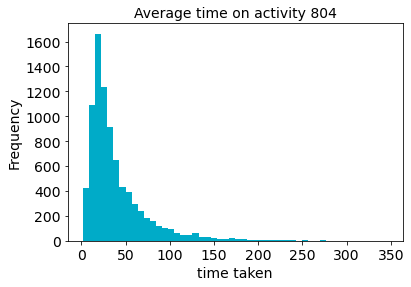

In [153]:
activity_time(804)

## Show activity realizacion function


In [154]:
neuronup_pie_colors = ['#00798d','#00abc8', '#04dbff', '#8deeff']
neuronup_2pie_colors = ['#00abc8', '#0089a1']

In [155]:
def realizacion(x):
  activity_x = import_activity(x)
  
  if activity_type(x) == 'Game type':
    cross_tab_realx = pd.crosstab(index=activity_x['activity_id'],
                             columns=activity_x['game_pantalla_realizacion'],
                             normalize="index")
    data = cross_tab_realx.iloc[0]
    labels = cross_tab_realx.columns
    if np.count_nonzero(cross_tab_realx.columns) <= 2:
      fig, axes = plt.subplots(1, 2, figsize=(15, 5))
      by_realiz = activity_x.groupby('game_pantalla_realizacion')
      realiz_means = by_realiz.aggregate(np.mean)
      realiz_means_sd = realiz_means[['score', 'difficulty']]
      ax = realiz_means_sd.plot(kind='bar', ax=axes[0], color=['#00798d', '#00abc8'], fontsize=12)
      ax.set_ylabel('Mean', fontsize=14)
      axes[0].set_title('Activity %d: Mean score and difficulty by Realizacion'%x, fontsize=14)
      ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=14)
      ax.set_xlabel('game_pantalla_realizacion', fontsize=14)
      ax.set_ylabel('Mean', fontsize=14)
      ax.legend(loc='best', bbox_to_anchor=(0.6,1), fontsize=14)
      ax = plt.pie(data, colors=neuronup_2pie_colors, labels=labels, autopct='%.3f%%')
      plt.title('Proportion of realizacion in activity %d'%x, bbox={'facecolor':'0.9', 'pad':8})
      plt.legend(labels, bbox_to_anchor=(0.9,0.3))
      plt.show()
      return pd.crosstab(index=activity_x['activity_id'],
                                columns=activity_x['game_pantalla_realizacion'])
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        by_realiz = activity_x.groupby('game_pantalla_realizacion')
        realiz_means = by_realiz.aggregate(np.mean)
        realiz_means_sd = realiz_means[['score', 'difficulty']]
        ax = realiz_means_sd.plot(kind='bar', ax=axes[0], color=['#00798d', '#00abc8'], fontsize=12)
        ax.set_ylabel('Mean', fontsize=14)
        axes[0].set_title('Activity %d: Mean score and difficulty by Realizacion'%x, fontsize=14)
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=14)
        ax.set_xlabel('game_pantalla_realizacion', fontsize=14)
        ax.set_ylabel('Mean', fontsize=14)
        ax.legend(loc='best', bbox_to_anchor=(0.6,1), fontsize=14)


        ax = plt.pie(data, colors=neuronup_pie_colors, labels=labels, autopct='%.1f%%')
        plt.title('Proportion of realizacion in activity %d'%x, bbox={'facecolor':'0.9', 'pad':8})
        plt.legend(labels, bbox_to_anchor=(0.9,0.3))
        plt.show()
        return pd.crosstab(index=activity_x['activity_id'],
                                  columns=activity_x['game_pantalla_realizacion'])
            
  elif activity_type(x) == 'Card type':
    cross_tab_realx = pd.crosstab(index=activity_x['activity_id'],
                             columns=activity_x['card_realizacion'],
                             normalize="index")
    data = cross_tab_realx.iloc[0]
    labels = cross_tab_realx.columns
    if np.count_nonzero(cross_tab_realx.columns) <= 2:
      fig, axes = plt.subplots(1, 2, figsize=(15, 5))

      by_realiz = activity_x.groupby('card_realizacion')
      realiz_means = by_realiz.aggregate(np.mean)
      realiz_means_sd = realiz_means[['score', 'difficulty']]
      ax = realiz_means_sd.plot(kind='bar', ax=axes[0], color=['#00798d', '#00abc8'], fontsize=12)
      ax.set_ylabel('Mean', fontsize=14)
      axes[0].set_title('Activity %d: Mean score and difficulty by Realizacion'%x, fontsize=14)
      ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=14)
      ax.set_xlabel('card_realizacion', fontsize=14)
      ax.set_ylabel('Mean', fontsize=14)
      ax.legend(loc='best', bbox_to_anchor=(0.6,1), fontsize=14)


      ax = plt.pie(data, colors=neuronup_2pie_colors, labels=labels, autopct='%.3f%%')
      plt.title('Proportion of realizacion in activity %d'%x, bbox={'facecolor':'0.9', 'pad':8})
      plt.legend(labels, bbox_to_anchor=(0.9,0.3))
      plt.show()
      return pd.crosstab(index=activity_x['activity_id'],
                                columns=activity_x['card_realizacion'])
    else:
      fig, axes = plt.subplots(1, 2, figsize=(15, 5))

      by_realiz = activity_x.groupby('card_realizacion')
      realiz_means = by_realiz.aggregate(np.mean)
      realiz_means_sd = realiz_means[['score', 'difficulty']]
      ax = realiz_means_sd.plot(kind='bar', ax=axes[0], color=['#00798d', '#00abc8'], fontsize=12)
      ax.set_ylabel('Mean', fontsize=14)
      axes[0].set_title('Activity %d: Mean score and difficulty by Realizacion'%x, fontsize=14)
      ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=14)
      ax.set_xlabel('card_realizacion', fontsize=14)
      ax.set_ylabel('Mean', fontsize=14)
      ax.legend(loc='best', bbox_to_anchor=(0.6,1), fontsize=14)
      ax = plt.pie(data, colors=neuronup_pie_colors, labels=labels, autopct='%.1f%%')
      plt.title('Proportion of realizacion in activity %d'%x, bbox={'facecolor':'0.9', 'pad':8})
      plt.legend(labels, bbox_to_anchor=(0.9,0.3))
      plt.show()
      return pd.crosstab(index=activity_x['activity_id'],
                                  columns=activity_x['card_realizacion'])

  else:
    cross_tab_realx = pd.crosstab(index=activity_x['activity_id'],
                             columns=activity_x['generator_realizacion'],
                             normalize="index")
    data = cross_tab_realx.iloc[0]
    labels = cross_tab_realx.columns
    print('Generator activities do not have different difficulties')
    if np.count_nonzero(cross_tab_realx.columns) <= 2:
       fig, axes = plt.subplots(1, 2, figsize=(15, 5))
       by_realiz = activity_x.groupby('generator_realizacion')
       realiz_means = by_realiz.aggregate(np.mean)
       realiz_means_sd = realiz_means[['score', 'difficulty']]
       ax = realiz_means_sd.plot(kind='bar', ax=axes[0], color=['#00798d', '#00abc8'], fontsize=12)
       ax.set_ylabel('Mean', fontsize=14)
       axes[0].set_title('Activity %d: Mean score and difficulty by Realizacion'%x, fontsize=14)
       ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=14)
       ax.set_xlabel('generator_realizacion', fontsize=14)
       ax.set_ylabel('Mean', fontsize=14)
       ax.legend(loc='best', bbox_to_anchor=(0.6,1), fontsize=14)
       ax = plt.pie(data, colors=neuronup_2pie_colors, labels=labels, autopct='%.3f%%')
       plt.title('Proportion of realizacion in activity %d'%x, bbox={'facecolor':'0.9', 'pad':8})
       plt.legend(labels, bbox_to_anchor=(0.9,0.3))
       plt.show()
       return pd.crosstab(index=activity_x['activity_id'],
                                    columns=activity_x['generator_realizacion'])
    else:
         fig, axes = plt.subplots(1, 2, figsize=(15, 5))
         by_realiz = activity_x.groupby('generator_realizacion')
         realiz_means = by_realiz.aggregate(np.mean)
         realiz_means_sd = realiz_means[['score', 'difficulty']]
         ax = realiz_means_sd.plot(kind='bar', ax=axes[0], color=['#00798d', '#00abc8'], fontsize=12)
         ax.set_ylabel('Mean', fontsize=14)
         axes[0].set_title('Activity %d: Mean score and difficulty by Realizacion'%x, fontsize=14)
         ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=14)
         ax.set_xlabel('generator_realizacion', fontsize=14)
         ax.set_ylabel('Mean', fontsize=14)
         ax.legend(loc='best', bbox_to_anchor=(0.6,1), fontsize=14)
         ax = plt.pie(data, colors=neuronup_pie_colors, labels=labels, autopct='%.1f%%')
         plt.title('Proportion of realizacion in activity %d'%x, bbox={'facecolor':'0.9', 'pad':8})
         plt.legend(labels, bbox_to_anchor=(0.9,0.3))
         plt.show()
         return pd.crosstab(index=activity_x['activity_id'],
                                      columns=activity_x['generator_realizacion'])


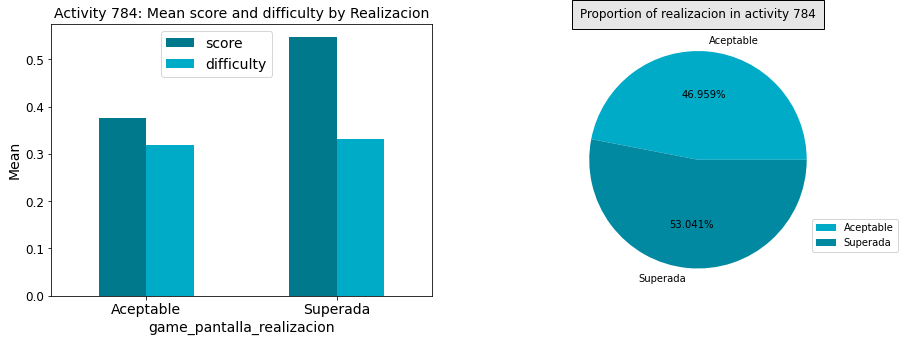

game_pantalla_realizacion,Aceptable,Superada
activity_id,,
784,169145,191055


In [156]:
realizacion(784)

Generator activities do not have different difficulties


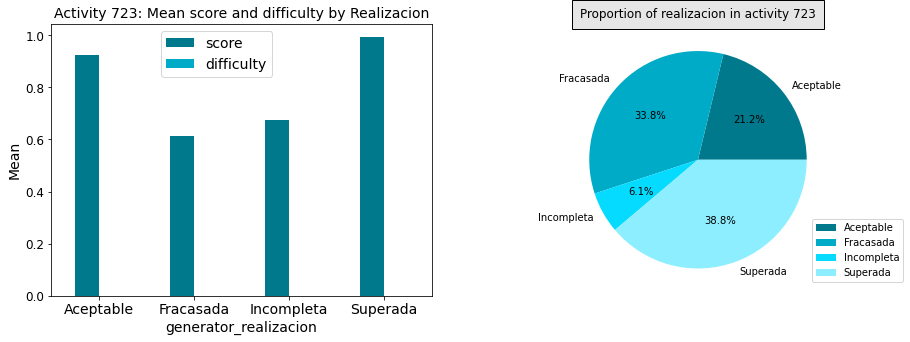

generator_realizacion,Aceptable,Fracasada,Incompleta,Superada
activity_id,,,,
723,16531,26288,4777,30211


In [157]:
realizacion(723)

## Show activity intentos function


In [158]:
def intentos(x):
  activity_x = import_activity(x)
  varx = show_result_variables(x)
  boolean = varx['Activity %d result variables'%x].str.contains('intentos')
  if np.count_nonzero(boolean) == 0:
    return ('This activity does not have an intentos variable')
  else:
    if activity_type(x) == 'Game type':
      by_difficulty = activity_x.groupby('difficulty')
      difficulty_means = by_difficulty.aggregate(np.mean)
      diff_reset = difficulty_means.reset_index()
      diff_reset['difficulty'] = round(diff_reset['difficulty'], 2)
      ax = sns.barplot(data=diff_reset,x='difficulty',y='game_intentos', order=diff_reset.sort_values('difficulty', ascending=True).difficulty, palette=neuronUP_10colors_darktolight)
      ax.set_title('Average intentos for each difficulty exercise on activity %d'%x, fontsize=14)
      ax.set_ylabel('Average game intentos')
      return
    elif activity_type(x) == 'Card type':
      by_difficulty = activity_x.groupby('difficulty')
      difficulty_means = by_difficulty.aggregate(np.mean)
      diff_reset = difficulty_means.reset_index()
      diff_reset['difficulty'] = round(diff_reset['difficulty'], 2)
      ax = sns.barplot(data=diff_reset,x='difficulty',y='card_intentos', order=diff_reset.sort_values('difficulty', ascending=True).difficulty, palette=neuronUP_10colors_darktolight)
      ax.set_title('Average intentos for each difficulty exercise on activity %d'%x, fontsize=14)
      ax.set_ylabel('Average card intentos')
      return
    else:
      print('Generator types do not have difficulty levels, here is average attempts for different score categories')
      print('*Note, high score is over 0.8, low score is under 0.4')
      activity_x_high_score = activity_x[activity_x['score']>0.8]
      activity_x_high_score_intentos_mean = np.mean(activity_x_high_score['generator_intentos'])
      activity_x_low_score = activity_x[activity_x['score']<0.4]
      activity_x_low_score_intentos_mean = np.mean(activity_x_low_score['generator_intentos'])
      higher_04 = activity_x[activity_x['score']>0.4]
      activity_x_middle_score = higher_04[higher_04['score'] < 0.8]
      activity_x_middle_score_intentos_mean = np.mean(activity_x_middle_score['generator_intentos'])
      x = ['high_score', 'middle_score', 'low_score']
      y = [activity_x_high_score_intentos_mean, activity_x_middle_score_intentos_mean, activity_x_low_score_intentos_mean]
      plt.bar(x, y, color='#00ABC8')
      plt.title("average Intentos for different score level", fontsize=14)
      plt.ylabel('Average intentos', fontsize=14)


      return






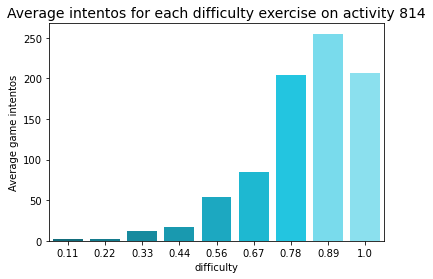

In [159]:
intentos(814)

## Show activity success v errors function


Calculate, when possible, the proportion of successes, proportion of errors.
Histogram of these proportions.

In [160]:
def aciertos_errores(x):
  activity_x = import_activity(x)
  varx = show_result_variables(x)
  boolean_aciertos = varx['Activity %d result variables'%x].str.contains('aciertos')
  boolean_errores = varx['Activity %d result variables'%x].str.contains('errores')
  if (np.count_nonzero(boolean_aciertos)) + (np.count_nonzero(boolean_errores)) != 2:
    return 'This activity does not have both an aciertos and errores variable'

  else:

    if activity_type(x) == 'Game type':
      activity_x['proportion_aciertos'] = activity_x['game_aciertos'] / (activity_x['game_aciertos'] + activity_x['game_errores'])
      ax = activity_x['proportion_aciertos'].plot(kind='hist', fontsize=14, color='#00ABC8')
      plt.xlabel('Proportion of aciertos', fontsize=14)
      plt.title('Activity %d: Proportion of aciertos compared to errores'%x,y=1.05, fontsize=14)
      return activity_x['proportion_aciertos'].describe()


    elif activity_type(x) == 'Card type':
      activity_x['proportion_aciertos'] = activity_x['card_aciertos'] / (activity_x['card_aciertos'] + activity_x['card_errores'])
      ax = activity_x['proportion_aciertos'].plot(kind='hist', fontsize=14, color='#00ABC8')
      plt.xlabel('Proportion of aciertos', fontsize=14)
      plt.title('Activity %d: Proportion of aciertos compared to errores'%x, y=1.05,fontsize=14)
      return activity_x['proportion_aciertos'].describe()

    else:
      activity_x['proportion_aciertos'] = activity_x['generator_aciertos'] / (activity_x['generator_aciertos'] + activity_x['generator_errores'])
      ax = activity_x['proportion_aciertos'].plot(kind='hist', fontsize=14, color='#00ABC8')
      plt.xlabel('Proportion of aciertos', fontsize=14)
      plt.title('Activity %d: Proportion of aciertos compared to errores'%x,y=1.05, fontsize=14)
      return activity_x['proportion_aciertos'].describe()

count    169801.000000
mean          0.885678
std           0.183567
min           0.055556
25%           0.833333
50%           1.000000
75%           1.000000
max           1.000000
Name: proportion_aciertos, dtype: float64

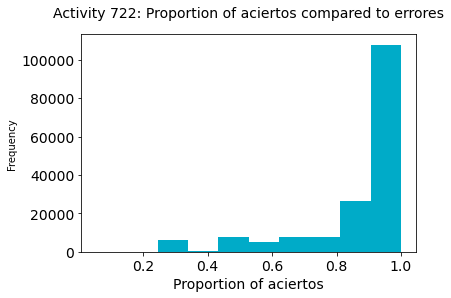

In [161]:
aciertos_errores(722)

## Show game activity sublevels function


In [162]:
def game_fase_pantalla_subenivel(x):
  activity_x = import_activity(x)
  varx = show_result_variables(x)
  boolean_sub = varx['Activity %d result variables'%x].str.contains('subenivel')
  if np.count_nonzero(boolean_sub) == 0:
    return 'This activity does not have sublevels'
  else:
    cross_tab_sublevel = pd.crosstab(index=activity_x['activity_id'],
                             columns=activity_x['game_fase_pantalla_subenivel'])
    by_subenivel = activity_x.groupby('game_fase_pantalla_subenivel')
    subenivel_means = by_subenivel.aggregate(np.mean)
    subenivel_means_sd = subenivel_means[['score', 'difficulty']]
    
    fig, axes = plt.subplots(1, 1)
    ax = subenivel_means_sd.plot(kind='bar', ax=axes, color=['#00798d', '#00abc8'], fontsize=12)
    ax.set_ylabel('Mean', fontsize=14)
    ax.set_title('\n Activity %d: Mean score and difficulty by subenivel'%x, fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 360, fontsize=14)
    ax.set_xlabel('Sublevel', fontsize=14)
    ax.legend(loc='best', bbox_to_anchor=(0.9,0.3), fontsize=14)
    return cross_tab_sublevel

game_fase_pantalla_subenivel,-1.0,1.0
activity_id,,
784,332878,27301


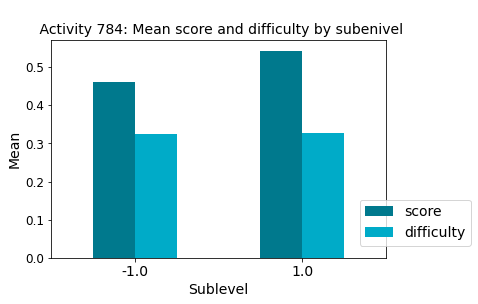

In [163]:
game_fase_pantalla_subenivel(784)

game_fase_pantalla_subenivel,-1.0,0.0,1.0
activity_id,,,
1085,75292,2435,3176


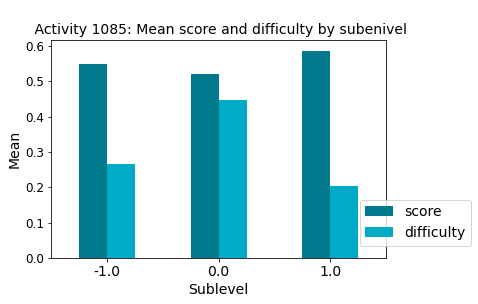

In [164]:
game_fase_pantalla_subenivel(1085)